<a href="https://colab.research.google.com/github/Annie-blare/WSL-FINALCODE/blob/main/AGRICULTURE(SDG2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########FOR 1D CAPABILITY VECTOR
###########ANALYSIS BETWEEN FACTOR AND CAPABILITY VECTOR

In [ ]:
######FUNCTION TO SORT A CSV FILE BASED ON DISTRICT


In [ ]:
import pandas as pd

def sort_csv_by_district(input_file_path, output_file_path):
    # Read the CSV file
    data = pd.read_csv(input_file_path)

    # Sort the data by the 'DISTRICT' column
    sorted_data = data.sort_values(by='District')

    # Save the sorted data to a new CSV file
    sorted_data.to_csv(output_file_path, index=False)

# Example usage
input_file_path = '/content/Agriculture_KAG_2016_17.csv'
output_file_path = '/content/Agriculture_KAG_2016_17.csv'
sort_csv_by_district(input_file_path, output_file_path)


In [ ]:
###########(1.)FOR ALL DISTRICT ANALYSIS

In [ ]:

import pandas as pd  #  pandas for data manipulation
import statsmodels.api as sm  # statsmodels for linear regression

# Function to perform linear regression analysis and calculate  percentage change
def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    """
    Perform linear regression analysis and calculate impact percentage for each district and perturbation.

    Args:
    - file_path (str): Path to the CSV file containing the dataset.
    - factor (str): The factor for which linear regression is performed.
    - Capability_Vector (str): The capability vector to analyze.
    - perturbations (list): List of perturbations in percentages to apply.

    Returns:
    - results_df (DataFrame): DataFrame containing the analysis results.
    """
    # Load the dataset
    data = pd.read_csv(file_path)  # Reading the CSV file into a DataFrame

    # Selecting the specified factor and capability vector
    x = data[[factor]]  # Selecting the factor as a DataFrame for consistency
    y = data[Capability_Vector]  # Selecting the capability vector as a Series

    # Performing linear regression using statsmodels
    X_with_const = sm.add_constant(x)  # Adding a constant for intercept
    model = sm.OLS(y, X_with_const).fit()  # Fitting the linear regression model
    m = model.params[factor]  # Getting the slope
    c = model.params['const']  # Getting the intercept

    print(f"Slope (m): {m}")  # Printing the slope (m) value
    print(f"Intercept (c): {c}")  # Printing the intercept (c) value

    results = []  # Initializing a list to store the results
    for district_name in data['District'].unique():  # Iterating over unique district names
        district_data = data[data['District'] == district_name]  # Filtering data for the current district
        for p in perturbations:  # Iterating over perturbations
            perturbation_ratio = p / 100.0  # Calculating perturbation ratio
            perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)  # Calculating perturbed factor value

            cv_new = m * perturbed_factor_value + c  # Calculating new capability vector
            cv_old = m * district_data[factor] + c  # Calculating old capability vector

            # Calculating the percentage impact
            percent_change = ((cv_new - cv_old) / cv_old) * 100

            # Appending results to the list
            results.append({
                'District': district_name,
                'Perturbation (%)': p,
                f'{Capability_Vector} (old)': cv_old.values[0],
                f'{Capability_Vector} (new)': cv_new.values[0],
                f'Change in {Capability_Vector}': cv_new.values[0] - cv_old.values[0],
                'Percentage Change (%)': percent_change.values[0],
            })

    results_df = pd.DataFrame(results)  # Creating a DataFrame from the results list

    return results_df  # Returning the DataFrame with analysis results

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Path to the CSV file
factor = 'TotalNPK'  # Factor for linear regression
Capability_Vector = 'Rice_Production'  # Capability vector to analyze
user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages
results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)  # Performing the analysis

# Displaying district-wise perturbations
for district_name in results_df['District'].unique():
    district_table = results_df[results_df['District'] == district_name].reset_index(drop=True)
    print(f"Table for {district_name}:")
    print(district_table.head(4).to_string(index=False))
    print()


Slope (m): 2.353363480056113
Intercept (c): 8136.426218911582
Table for BAGALKOT:
District  Perturbation (%)  Rice_Production (old)  Rice_Production (new)  Change in Rice_Production  Percentage Change (%)
BAGALKOT               -20          207729.889689          167811.196995              -39918.692694             -19.216634
BAGALKOT               -10          207729.889689          187770.543342              -19959.346347              -9.608317
BAGALKOT                10          207729.889689          227689.236036               19959.346347               9.608317
BAGALKOT                20          207729.889689          247648.582384               39918.692694              19.216634

Table for BALLARI:
District  Perturbation (%)  Rice_Production (old)  Rice_Production (new)  Change in Rice_Production  Percentage Change (%)
 BALLARI               -20          298374.390851          240326.797924              -58047.592926             -19.454616
 BALLARI               -10          2

In [ ]:
#####################(2.)Scatter plot analysis fOR ALL 30 DISTRICT ANALYSIS

2.353363480056113
8136.426218911565


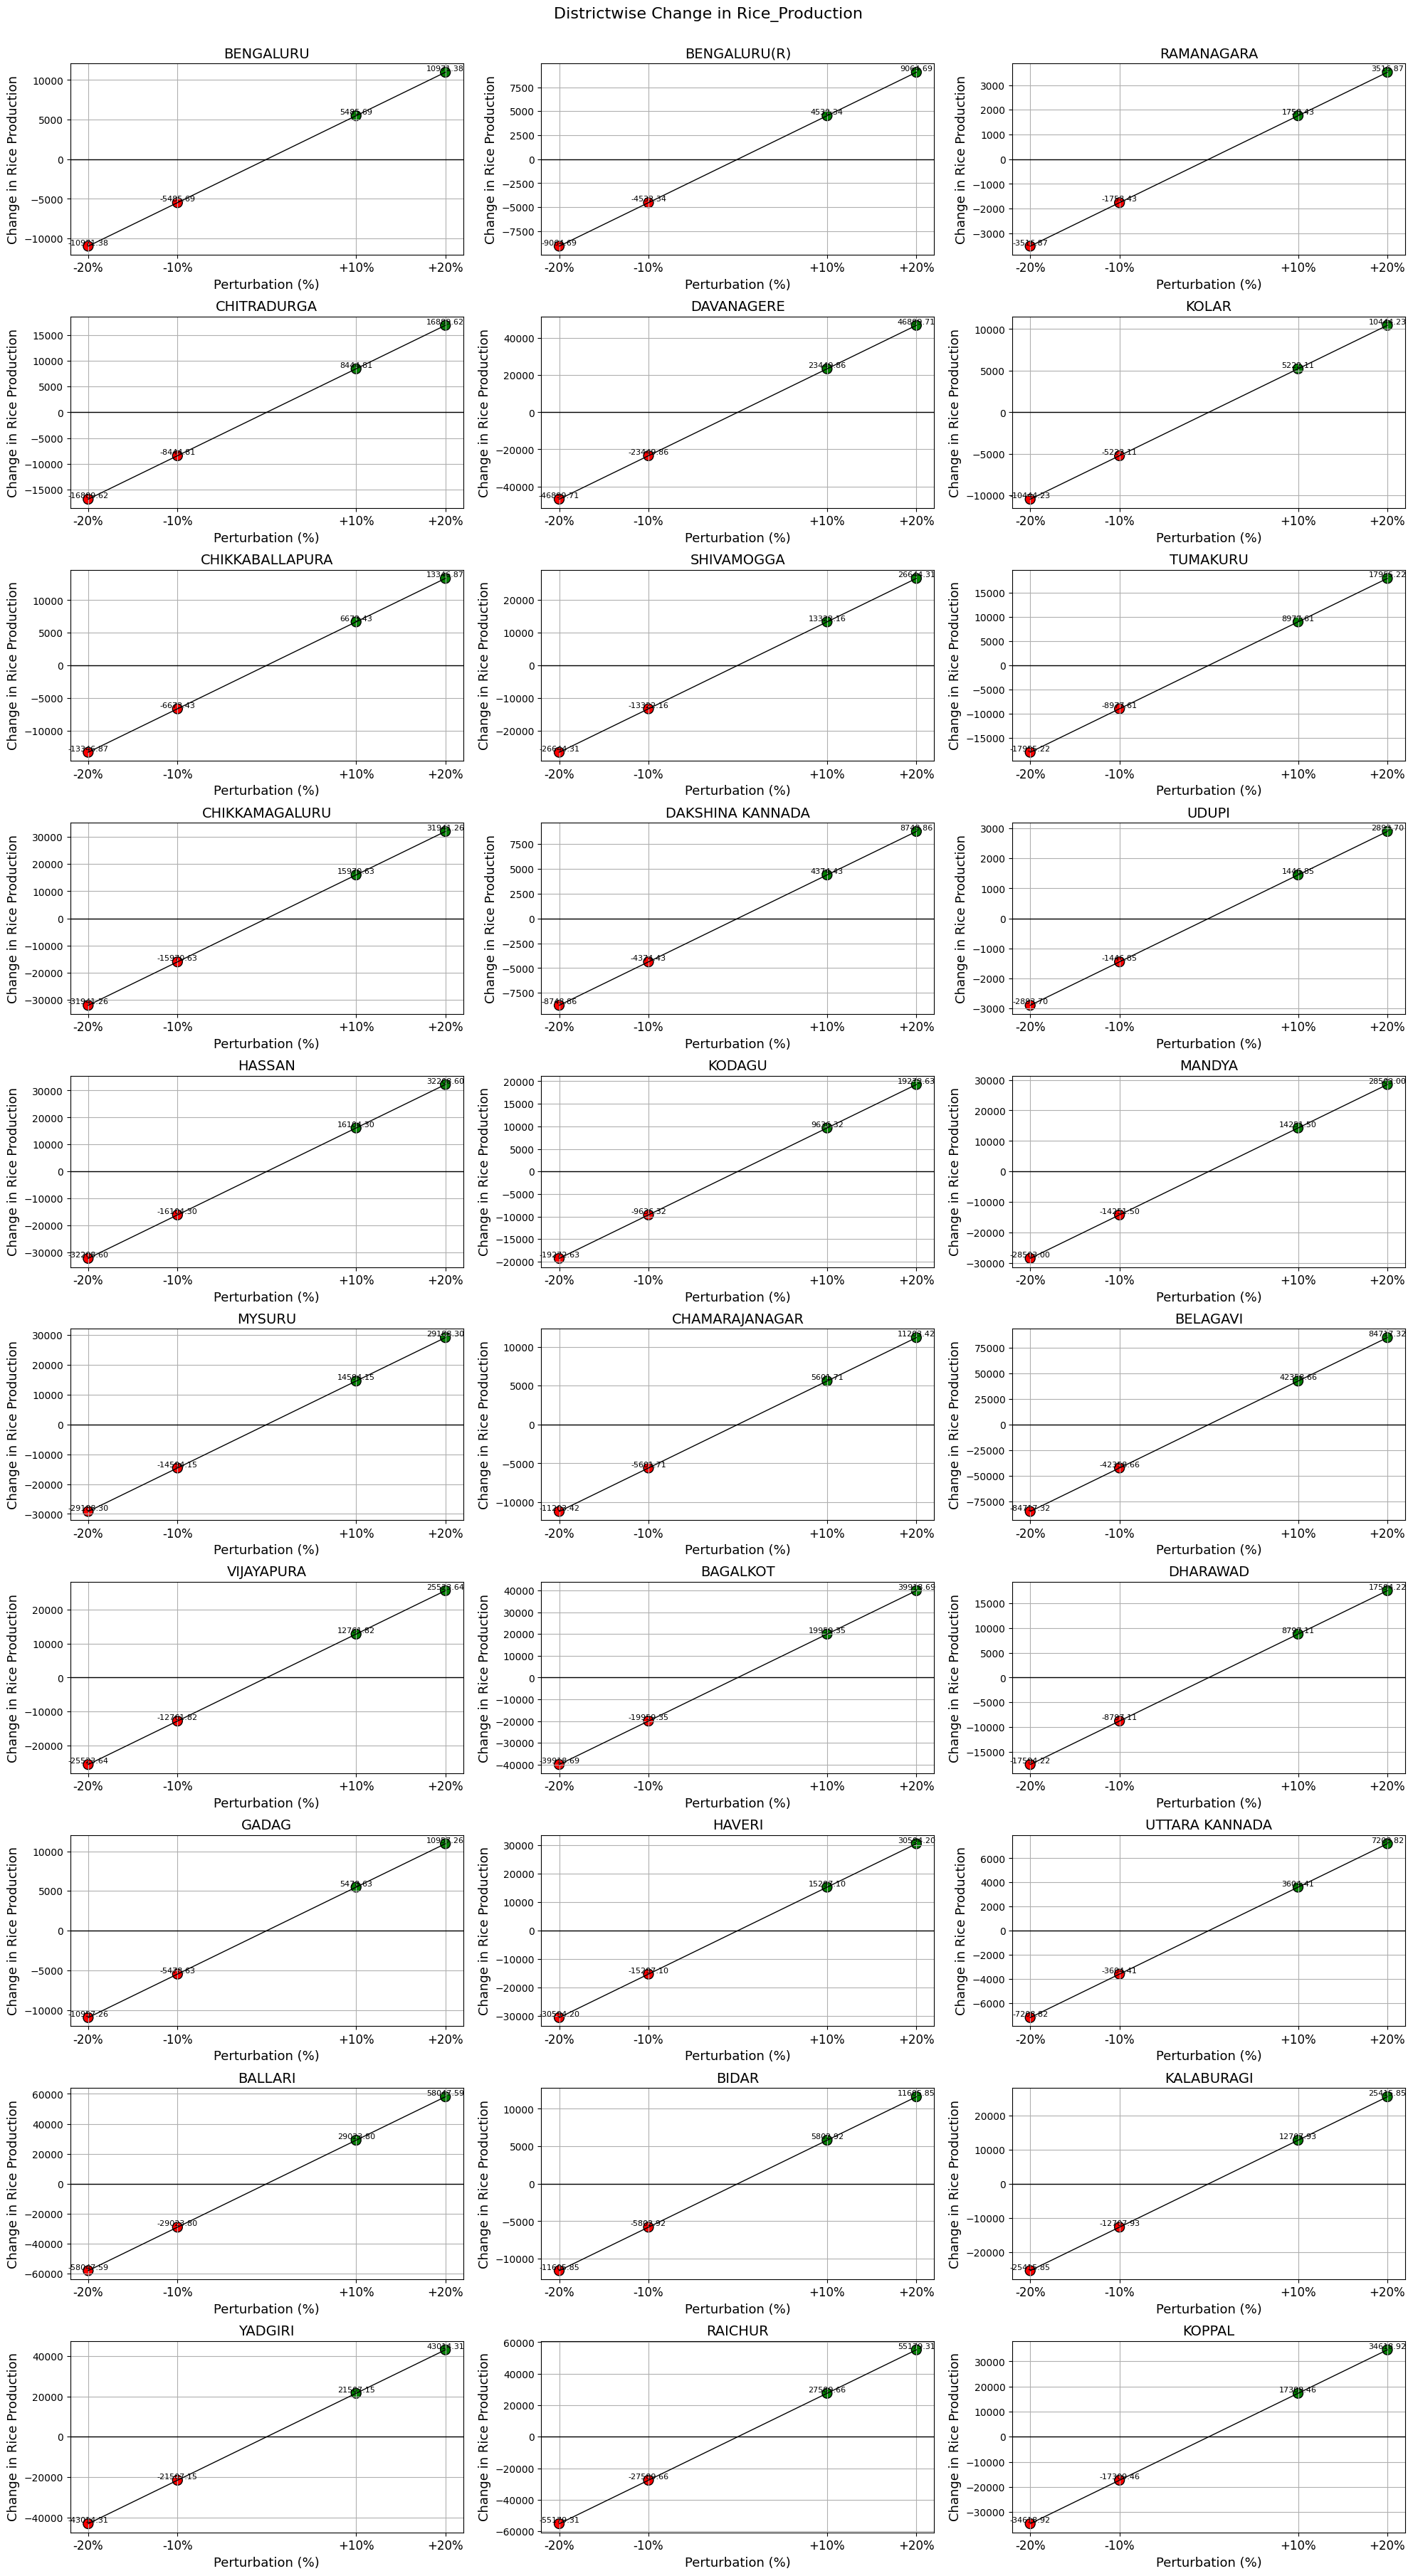

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

def generate_colors(impacts):
    return ['green' if impact > 0 else 'red' for impact in impacts]

def plot_districtwise_impacts(results_df, user_perturbations):
    """
    Plot the impact of perturbations on Rice Production for each district in a single figure using scatter plots.

    Parameters:
    - results_df: DataFrame containing the analysis results including the district, perturbations, and their impacts.
    - user_perturbations: list, a list of perturbation percentages used in the analysis.
    """

    # Prepare a figure to plot multiple subplots
    plt.figure(figsize=(20, 40))  # Adjust the figure size as needed for clarity and space

    unique_districts = results_df['District'].unique()
    perturbations_corrected = [p / 100.0 for p in user_perturbations]  # This assumes the same perturbations are applied to all districts

    for i, district in enumerate(unique_districts, start=1):
        district_data = results_df[results_df['District'] == district]
        impacts = district_data[f'Change in Rice_Production'].tolist()
        colors = generate_colors(impacts)

        # Adjust the subplot to have an appropriate number of rows and columns
        plt.subplot(len(unique_districts)//3+1, 3, i)  # Dynamically adjust based on the number of districts

        plt.scatter(perturbations_corrected, impacts, color=colors, edgecolor='black', s=100)
        for j, impact in enumerate(impacts):
            plt.text(perturbations_corrected[j], impact, f'{impact:.2f}', ha='center', va='bottom', fontsize=8)
        plt.plot(perturbations_corrected, impacts, color='black', linestyle='-', linewidth=1)  # Add line connecting the dots
        plt.xticks(perturbations_corrected, [f'{p*100:+.0f}%' for p in perturbations_corrected], fontsize=12)  # Increase font size
        plt.axhline(0, color='black', lw=1)
        plt.title(f'{district}', fontsize=14)  # Increase title font size
        plt.xlabel('Perturbation (%)', fontsize=13)  # Increase font size
        plt.ylabel('Change in Rice Production', fontsize=13)  # Increase font size
        plt.grid(True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
    plt.suptitle('Districtwise Change in Rice_Production', fontsize=16, y=0.98)  # Increase super title font size and adjust position

    plt.show()

# Assuming results_df is already defined and contains the analysis results
# And assuming user_perturbations is defined as well
# plot_districtwise_impacts(results_df, user_perturbations)

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    # Load the dataset
    data = pd.read_csv('/content/Agriculture_KAG_2016_17.csv')

    # Selecting the specified factor and capability vector
    X = data[[factor]]
    y = data[Capability_Vector]

    # Performing linear regression using statsmodels
    X_with_const = sm.add_constant(X)  # Adding a constant for intercept
    model = sm.OLS(y, X_with_const).fit()
    m = model.params[factor]  # Slope
    c = model.params['const']  # Intercept

    print(m)
    print(c)

    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]
        for p in perturbations:
            perturbation_ratio = p / 100.0
            perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

            cv_new = m * perturbed_factor_value + c
            cv_old = m * district_data[factor] + c

            # Calculating the percentage impact
            impact_percent = ((cv_new - cv_old) / cv_old) * 100

            results.append({
                'District': district_name,
                'Perturbation (%)': p,
                f'{Capability_Vector} (old)': cv_old.values[0],
                f'{Capability_Vector} (new)': cv_new.values[0],
                f'Change in {Capability_Vector}': cv_new.values[0] - cv_old.values[0],
                 'Impact (%)': impact_percent.values[0],
            })

    results_df = pd.DataFrame(results)

    return results_df


# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
factor = 'TotalNPK'  # Adjust as needed
Capability_Vector = 'Rice_Production'  # Adjust as needed
user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages
results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

# Perform the analysis and plot for all districts in a single figure
plot_districtwise_impacts(results_df, user_perturbations)


In [ ]:
##############PERCENTAGE_CHANGE VS PERTURBATIONS

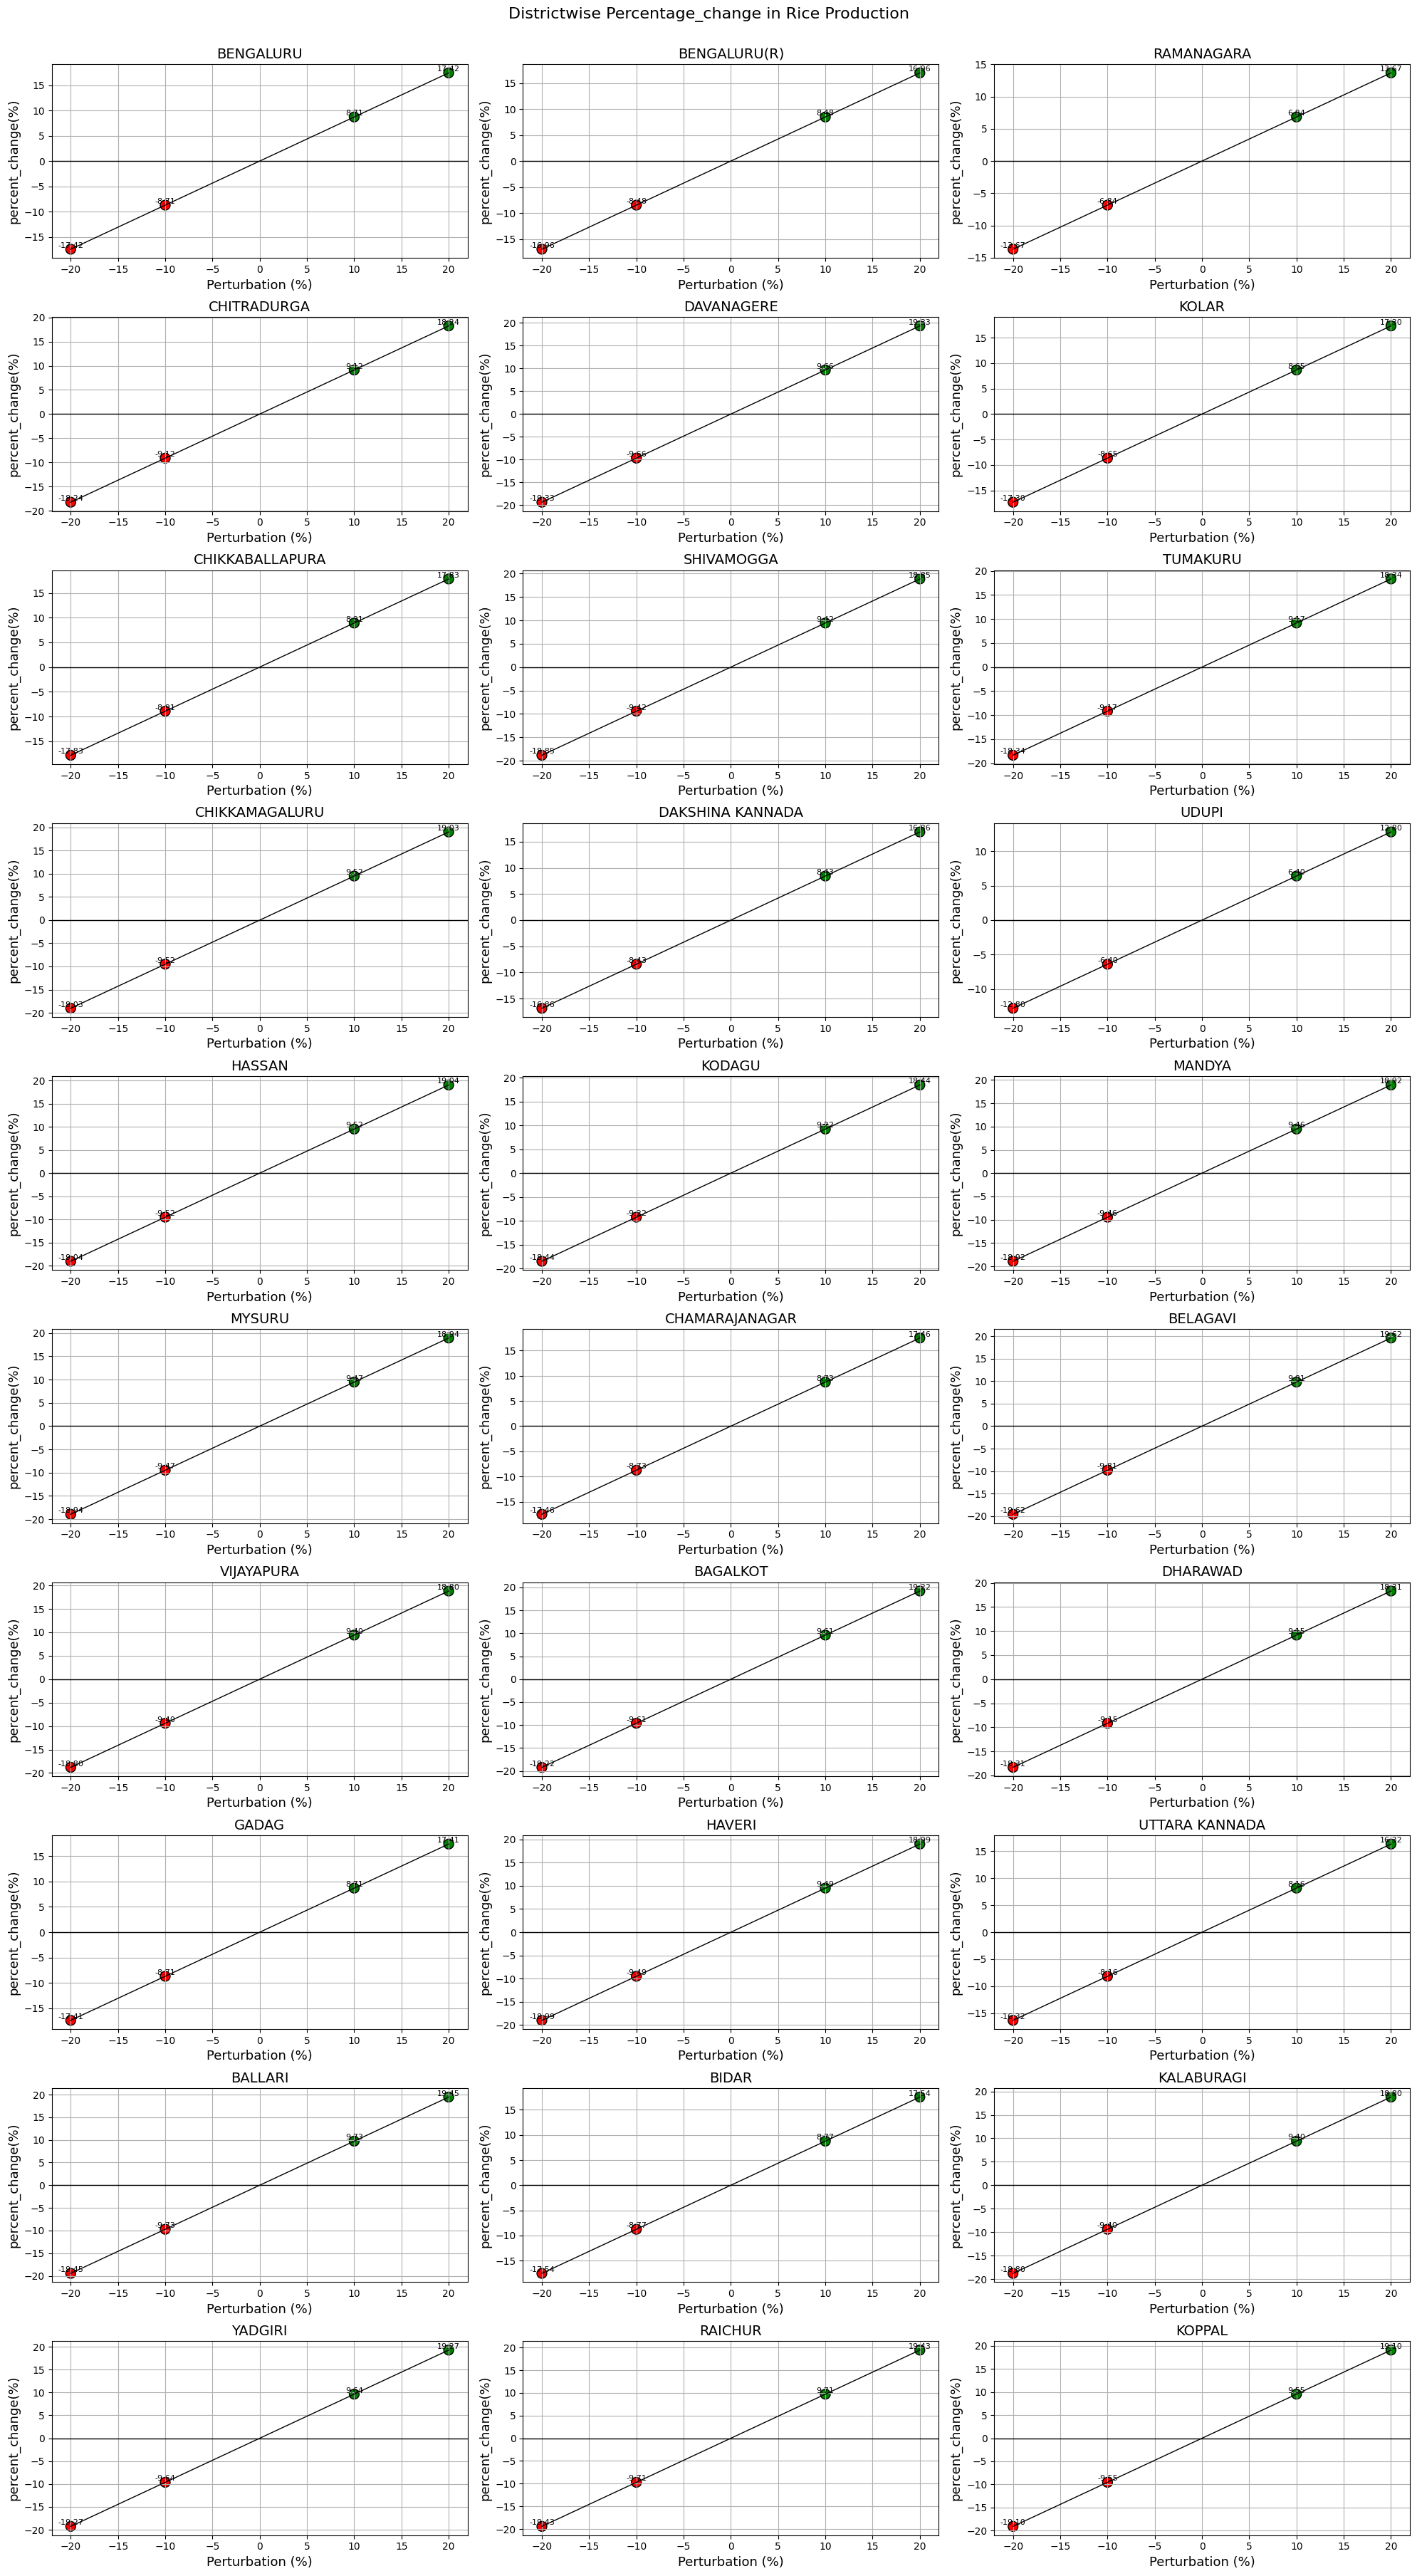

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def generate_colors(impacts):
    return ['green' if impact > 0 else 'red' for impact in impacts]

def perform_analysis(file_path, factor, capability_vector, perturbations):
    """
    Perform linear regression analysis and calculate the impact of perturbations on a specific factor.

    Parameters:
    - file_path: str, path to the dataset.
    - factor: str, name of the factor column in the dataset.
    - capability_vector: str, name of the capability vector column in the dataset.
    - perturbations: list of int, list of perturbation percentages.

    Returns:
    - DataFrame with the analysis results.
    """
    data = pd.read_csv(file_path)
    X = data[[factor]]
    y = data[capability_vector]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    m = model.params[factor]  # Slope
    c = model.params['const']  # Intercept

    results = []
    for district in data['District'].unique():
        district_data = data[data['District'] == district]
        for perturbation in perturbations:
            perturbed_factor = district_data[factor] * (1 + perturbation / 100.0)
            cv_new = m * perturbed_factor + c
            cv_old = m * district_data[factor] + c
            impact_percent = ((cv_new - cv_old) / cv_old) * 100
            results.append({
                'District': district,
                'Perturbation (%)': perturbation,
                'Impact (%)': impact_percent.values[0]
            })

    return pd.DataFrame(results)

def plot_districtwise_impacts(results_df, user_perturbations):
    """
    Plot the impact (%) of perturbations on a specific factor for each district.

    Parameters:
    - results_df: DataFrame, the analysis results including district, perturbations, and impacts.
    - user_perturbations: list of int, list of perturbation percentages.
    """
    plt.figure(figsize=(20, 40))  # Adjust as needed
    unique_districts = results_df['District'].unique()

    for i, district in enumerate(unique_districts, start=1):
        district_data = results_df[results_df['District'] == district]
        impacts = district_data['Impact (%)'].tolist()
        colors = generate_colors(impacts)

        plt.subplot(len(unique_districts) // 3 + 1, 3, i)
        plt.scatter(user_perturbations, impacts, color=colors, edgecolor='black', s=100)
        for j, impact in enumerate(impacts):
            plt.text(user_perturbations[j], impact, f'{impact:.2f}', ha='center', va='bottom', fontsize=8)
        plt.plot(user_perturbations, impacts, color='black', linestyle='-', linewidth=1)
        plt.title(district, fontsize=14)
        plt.xlabel('Perturbation (%)', fontsize=13)
        plt.ylabel('percent_change(%)', fontsize=13)
        plt.axhline(0, color='black', lw=1)
        plt.grid(True)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)
    plt.suptitle('Districtwise Percentage_change in Rice Production', fontsize=16, y=0.98)
    plt.show()


# Example usage:
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this to your dataset's path
factor = 'TotalNPK'  # The factor you're analyzing
capability_vector = 'Rice_Production'  # The outcome variable you're interested in
user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages

results_df = perform_analysis(file_path, factor, capability_vector, user_perturbations)
plot_districtwise_impacts(results_df, user_perturbations)


In [ ]:
###############CHANGE VS PERTURBATIONS

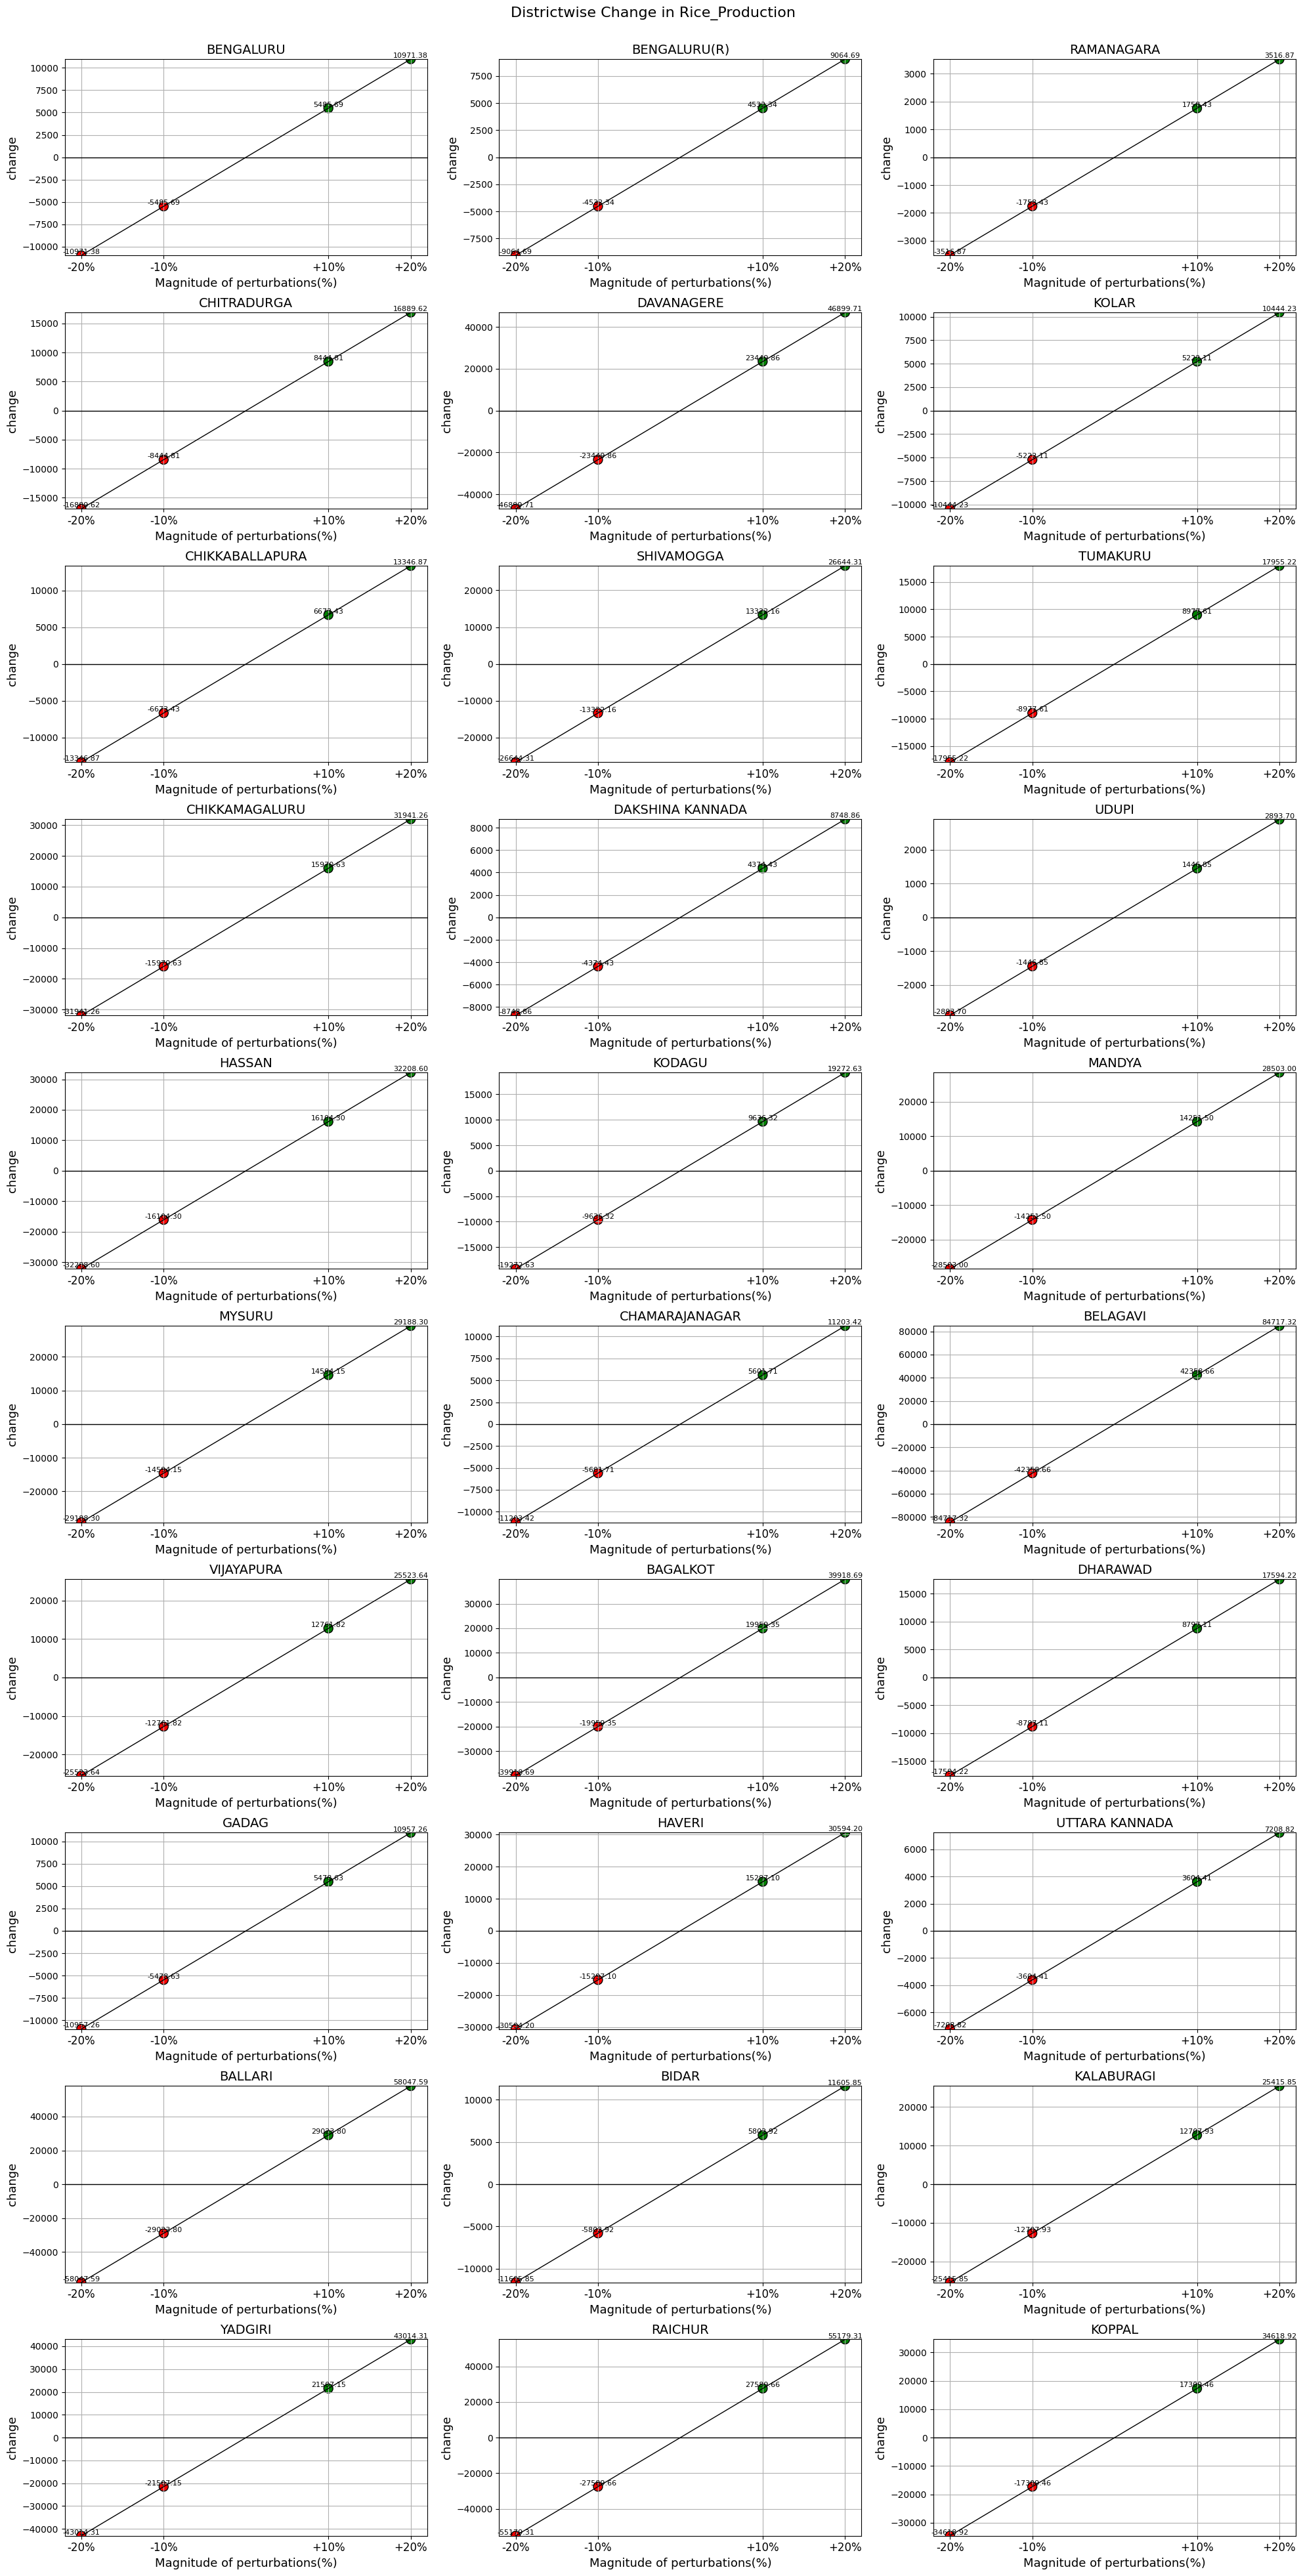

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

def generate_colors(impacts):
    return ['green' if impact > 0 else 'red' for impact in impacts]

def plot_impact_analysis_all_in_one(file_path, factor, Capability_Vector, user_perturbations):
    """
    Perform analysis on the impact of perturbations on a given factor and plot the results
    for all districts in a single figure using scatter plots.

    Parameters:
    - file_path: str, path to the dataset.
    - factor: str, the name of the factor column.
    - Capability_Vector: str, the name of the capability vector column.
    - user_perturbations: list, a list of perturbation percentages.
    """

    data = pd.read_csv(file_path)

    # Linear regression
    X = data[[factor]]
    y = data[Capability_Vector]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    m = model.params[factor]  # Slope
    c = model.params['const']  # Intercept

    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Prepare a figure to plot multiple subplots
    plt.figure(figsize=(20, 40))  # Adjust the figure size as needed for clarity and space

    for i, district in enumerate(data['District'].unique(), start=1):
        district_data = data[data['District'] == district]
        district_factor = district_data[factor].iloc[0]
        cv_old = m * district_factor + c

        impacts = []
        for p in perturbations_corrected:
            perturbed_factor = district_factor * (1 + p)
            cv_new = m * perturbed_factor + c
            change = cv_new - cv_old
            impacts.append(change)

        colors = generate_colors(impacts)

        # Adjust the subplot to have 10 rows and 3 columns
        plt.subplot(10, 3, i)
        plt.scatter(perturbations_corrected, impacts, color=colors, edgecolor='black', s=100)
        for j, impact in enumerate(impacts):
            plt.text(perturbations_corrected[j], impact, f'{impact:.2f}', ha='center', va='bottom', fontsize=8)
        plt.plot(perturbations_corrected, impacts, color='black', linestyle='-', linewidth=1)  # Add line connecting the dots
        plt.xticks(perturbations_corrected, [f'{p*100:+.0f}%' for p in perturbations_corrected], fontsize=12)  # Increase font size
        plt.axhline(0, color='black', lw=1)
        plt.title(f'{district}', fontsize=14)  # Increase title font size
        plt.xlabel('Magnitude of perturbations(%)', fontsize=13)  # Increase font size
        plt.ylabel('change', fontsize=13)  # Increase font size
        plt.grid(True)

        # Adjust limits and annotate impacts if needed
        plt.ylim(min(impacts) - 10, max(impacts) + 10)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
    plt.suptitle('Districtwise Change in Rice_Production', fontsize=16, y=0.98)  # Increase super title font size and adjust position

    plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
factor = 'TotalNPK'  # Adjust as needed
Capability_Vector = 'Rice_Production'  # Adjust as needed
user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages

# Perform the analysis and plot for all districts in a single figure
plot_impact_analysis_all_in_one(file_path, factor, Capability_Vector, user_perturbations)


In [ ]:
################CHANGE_RATION ANALYSIS

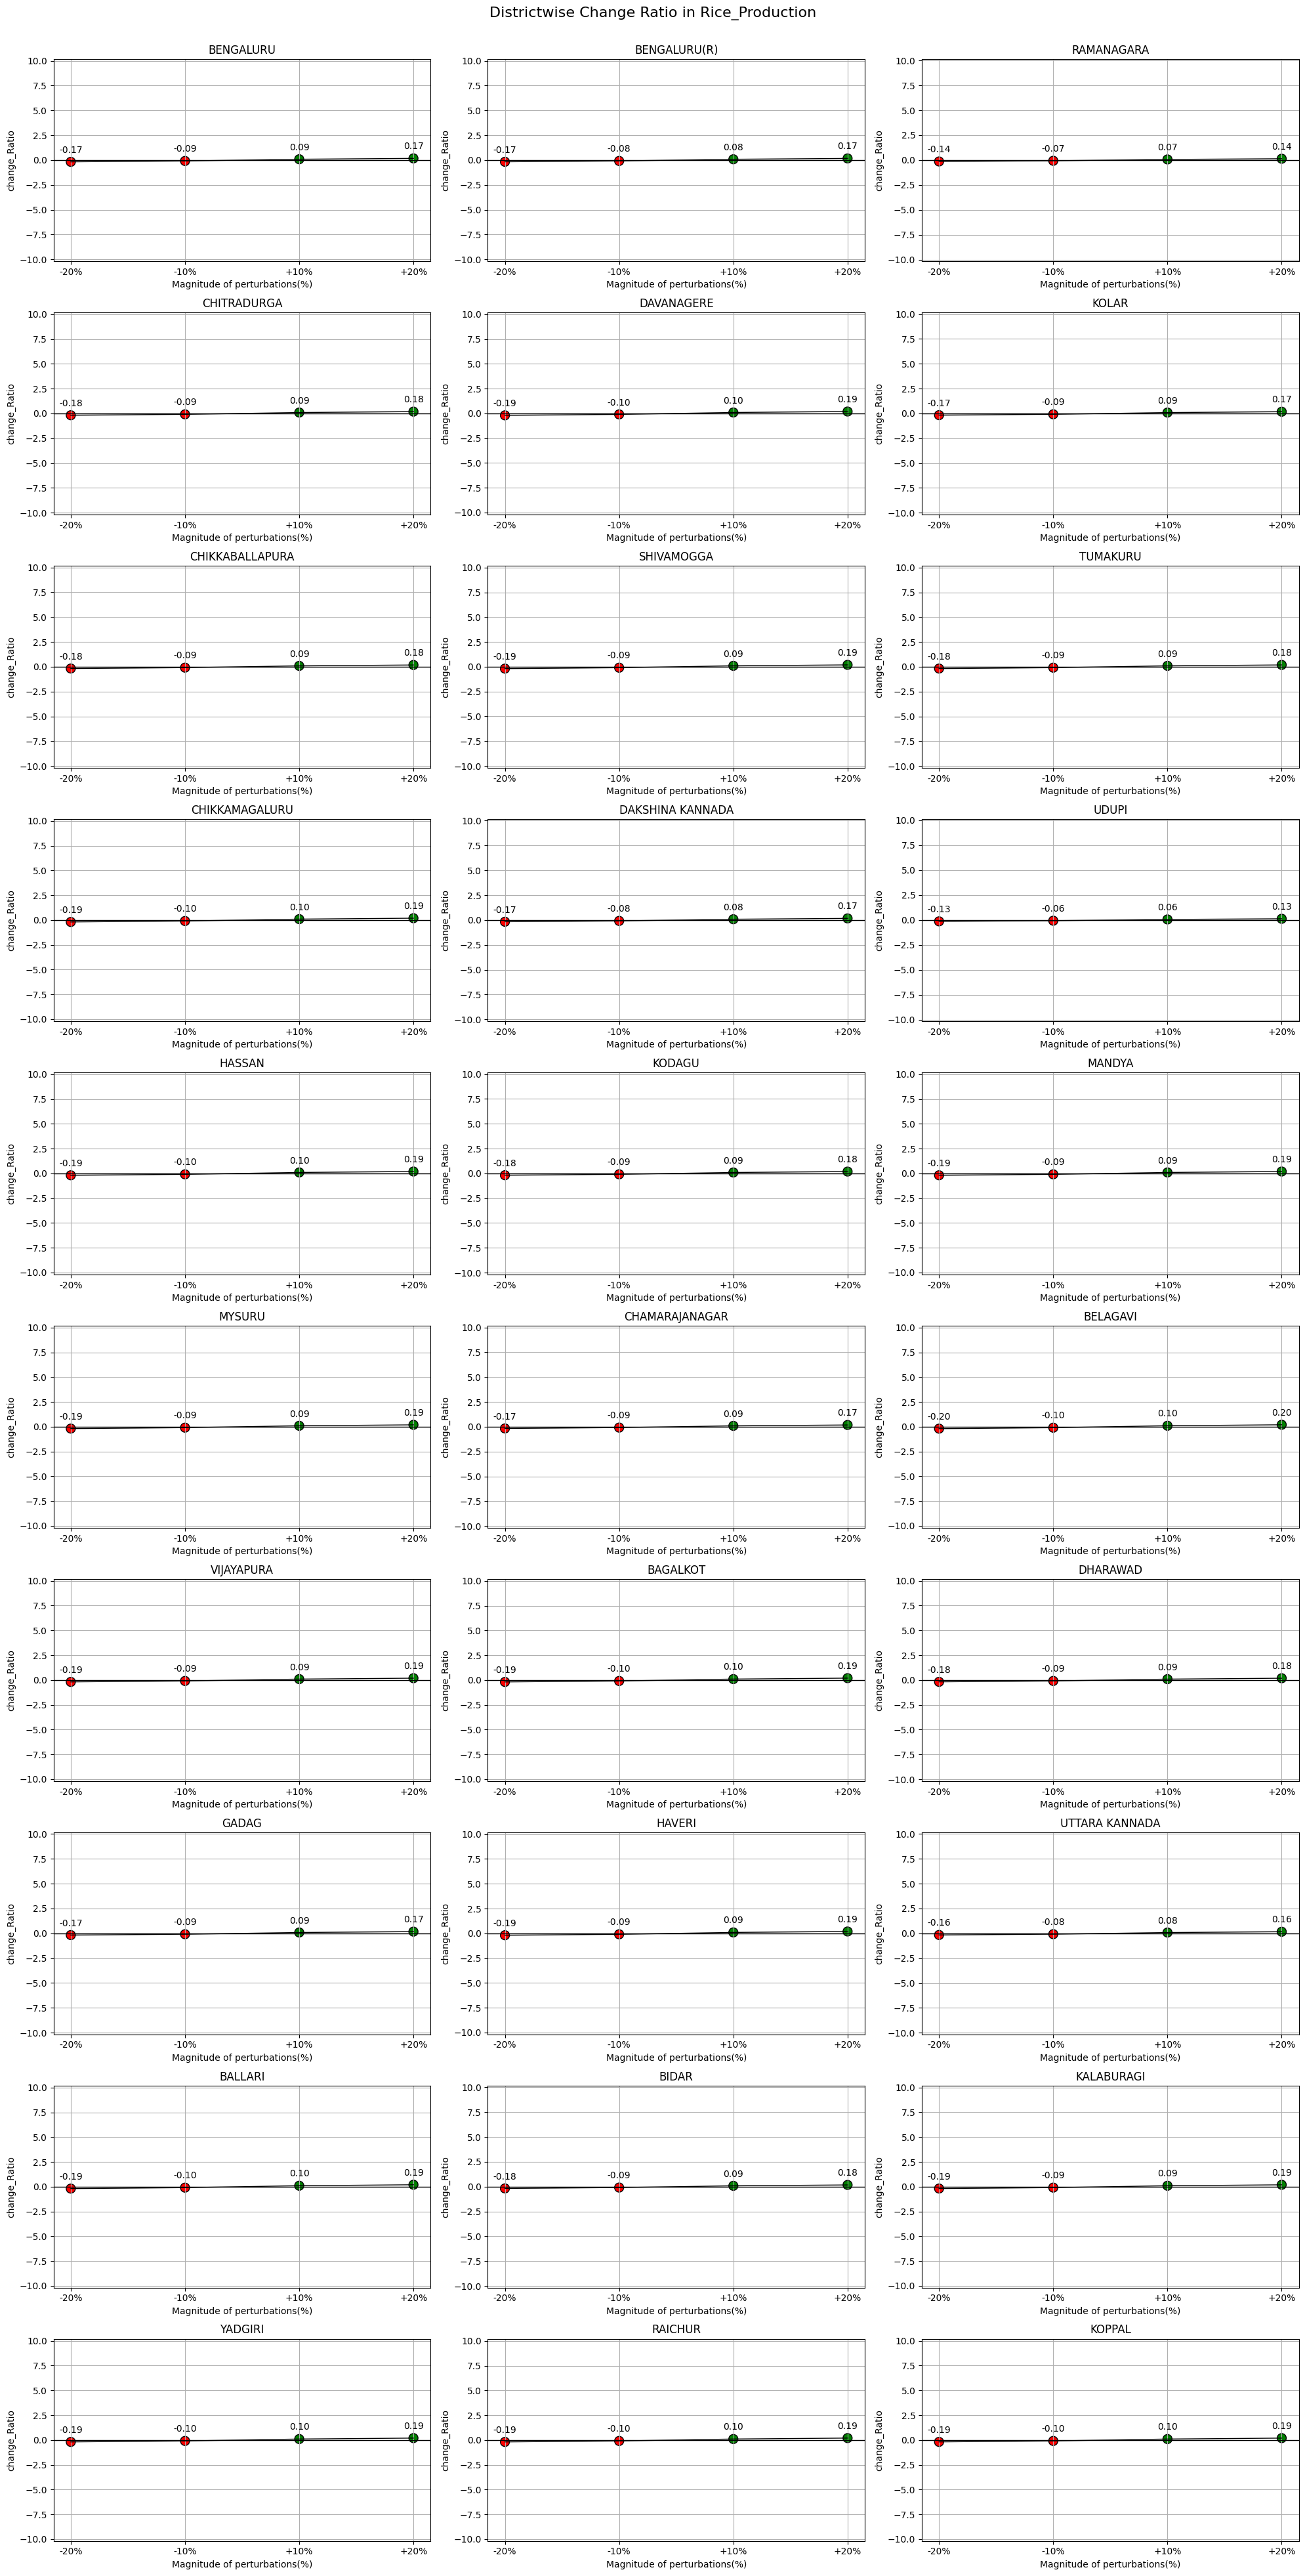

In [49]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# import statsmodels.api as sm

# def generate_colors(impacts):
#     return ['green' if impact > 0 else 'red' for impact in impacts]

# def plot_impact_analysis_all_in_one(file_path, factor, Capability_Vector, user_perturbations):
#     data = pd.read_csv(file_path)

#     # Linear regression
#     X = data[[factor]]
#     y = data[Capability_Vector]
#     model = sm.OLS(y, sm.add_constant(X)).fit()
#     m = model.params[factor]  # Slope
#     c = model.params['const']  # Intercept

#     perturbations_corrected = [p / 100.0 for p in user_perturbations]

#     plt.figure(figsize=(20, 40))  # Adjust the figure size as needed

#     for i, district in enumerate(data['District'].unique(), start=1):
#         district_data = data[data['District'] == district]
#         district_factor = district_data[factor].iloc[0]
#         cv_old = m * district_factor + c

#         impacts = []
#         for p in perturbations_corrected:
#             perturbed_factor = district_factor * (1 + p)
#             cv_new = m * perturbed_factor + c
#             change = (cv_new - cv_old) / cv_old
#             impacts.append(change)

#         colors = generate_colors(impacts)

#         plt.subplot(len(data['District'].unique()) // 3 + 1, 3, i)  # Adjust subplot grid as needed
#         scatter_positions = np.arange(len(perturbations_corrected))
#         plt.scatter(scatter_positions, impacts, color=colors, edgecolor='black', s=100)

#         for j, impact in enumerate(impacts):
#             plt.annotate(f'{impact:.2f}', (scatter_positions[j], impacts[j]), textcoords="offset points", xytext=(0,10), ha='center')

#         if len(perturbations_corrected) > 1:
#             plt.plot(scatter_positions, impacts, color='black', linestyle='-', linewidth=1)

#         plt.xticks(scatter_positions, [f'{p*100:+.0f}%' for p in perturbations_corrected])
#         plt.axhline(0, color='black', lw=1)
#         plt.title(f'{district}')
#         plt.xlabel('Magnitude of perturbations(%)')
#         plt.ylabel('Impact')
#         plt.grid(True)
#         plt.ylim(-1, 1)  # Fixed y-axis scale

#     plt.tight_layout()
#     plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
#     plt.suptitle('Districtwise Impact on Rice Production', fontsize=16, y=0.98)
#     plt.show()

# # Example usage
# file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
# factor = 'TotalNPK'  # Adjust as needed
# Capability_Vector = 'Rice_Production'  # Adjust as needed
# user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages

# plot_impact_analysis_all_in_one(file_path, factor, Capability_Vector, user_perturbations)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

def generate_colors(impacts):
    # Corrected to use 'impact' for the condition inside the list comprehension
    return ['green' if impact > 0 else 'red' for impact in impacts]

def plot_impact_analysis_all_in_one(file_path, factor, Capability_Vector, user_perturbations):
    """
    Perform analysis on the impact of perturbations on a given factor and plot the results
    for all districts in a single figure using scatter plots.

    Parameters:
    - file_path: str, path to the dataset.
    - factor: str, the name of the factor column.
    - Capability_Vector: str, the name of the capability vector column.
    - user_perturbations: list, a list of perturbation percentages.
    """

    data = pd.read_csv(file_path)

    # Linear regression
    X = data[[factor]]
    y = data[Capability_Vector]
    model = sm.OLS(y, sm.add_constant(X)).fit()
    m = model.params[factor]  # Slope
    c = model.params['const']  # Intercept

    perturbations_corrected = [p / 100.0 for p in user_perturbations]

    # Prepare a figure to plot multiple subplots
    plt.figure(figsize=(20, 40))  # Adjust the figure size as needed for clarity and space

    for i, district in enumerate(data['District'].unique(), start=1):
        district_data = data[data['District'] == district]
        district_factor = district_data[factor].iloc[0]
        cv_old = m * district_factor + c

        impacts = []
        for p in perturbations_corrected:
            perturbed_factor = district_factor * (1 + p)
            cv_new = m * perturbed_factor + c
            change = (cv_new - cv_old)/cv_old
            impacts.append(change)

        colors = generate_colors(impacts)  # Corrected to use 'impacts'

        # Adjust the subplot to have 10 rows and 3 columns (or adjust as needed)
        plt.subplot(10, 3, i)
        scatter_positions = np.arange(len(perturbations_corrected))
        for j, impact in enumerate(impacts):
            plt.annotate(f'{impact:.2f}', (scatter_positions[j], impact), textcoords="offset points", xytext=(0,10), ha='center')
        if len(perturbations_corrected) > 1:
            plt.plot(scatter_positions, impacts, color='black', linestyle='-', linewidth=1)
        plt.scatter(scatter_positions, impacts, color=colors, edgecolor='black', s=100)
        plt.xticks(scatter_positions, [f'{p*100:+.0f}%' for p in perturbations_corrected])
        plt.axhline(0, color='black', lw=1)
        plt.title(f'{district}')
        plt.xlabel('Magnitude of perturbations(%)')
        plt.ylabel('change_Ratio')
        plt.grid(True)

        # Adjust limits if needed
        plt.ylim(min(impacts) - 10, max(impacts) + 10)

    plt.tight_layout()
    plt.subplots_adjust(top=0.96)  # Adjust space between super title and subplots
    plt.suptitle('Districtwise Change Ratio in Rice_Production', fontsize=16, y=0.98)

    plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
factor = 'TotalNPK'  # Adjust as needed
Capability_Vector = 'Rice_Production'  # Adjust as needed
user_perturbations = [-20, -10, 10, 20]  # Example perturbations in percentages

# Perform the analysis and plot for all districts in a single figure
plot_impact_analysis_all_in_one(file_path, factor, Capability_Vector, user_perturbations)


In [ ]:
##################BAR GRAPH FOR ALL 30 DISTRICTS

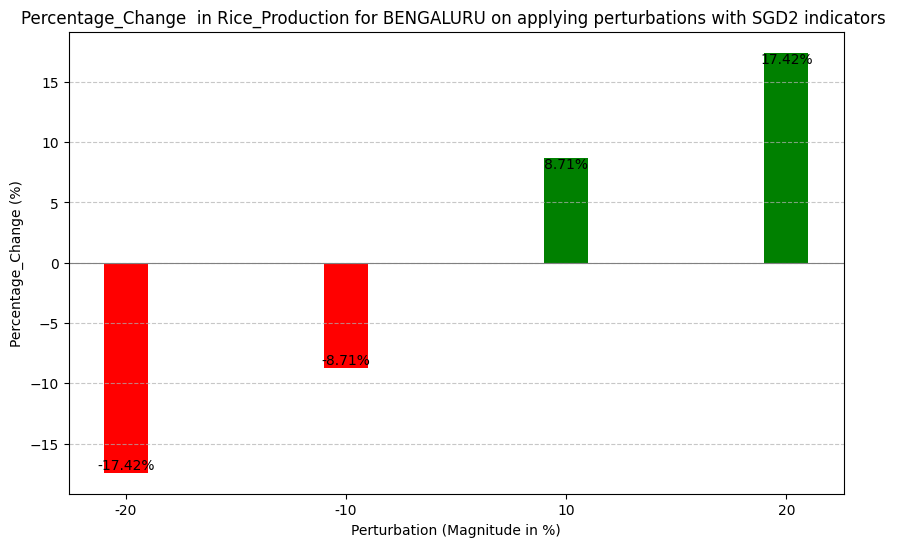

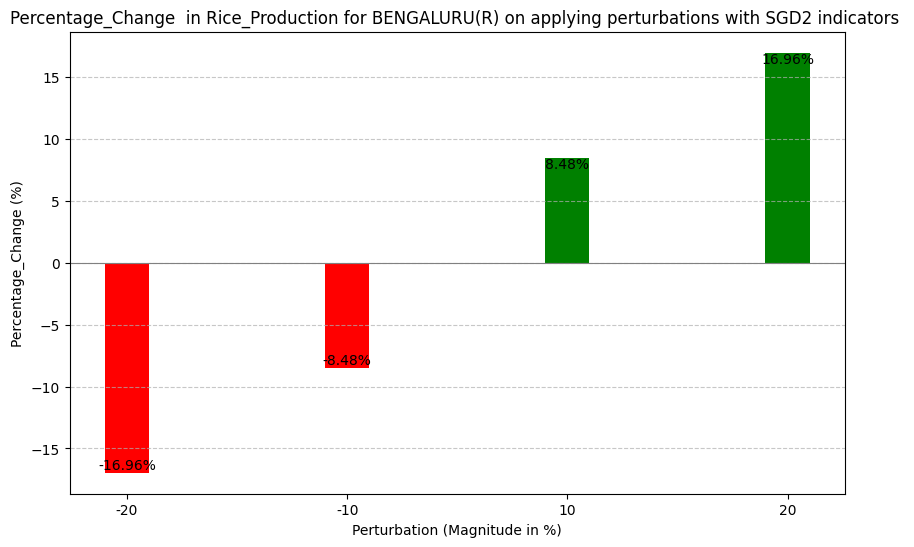

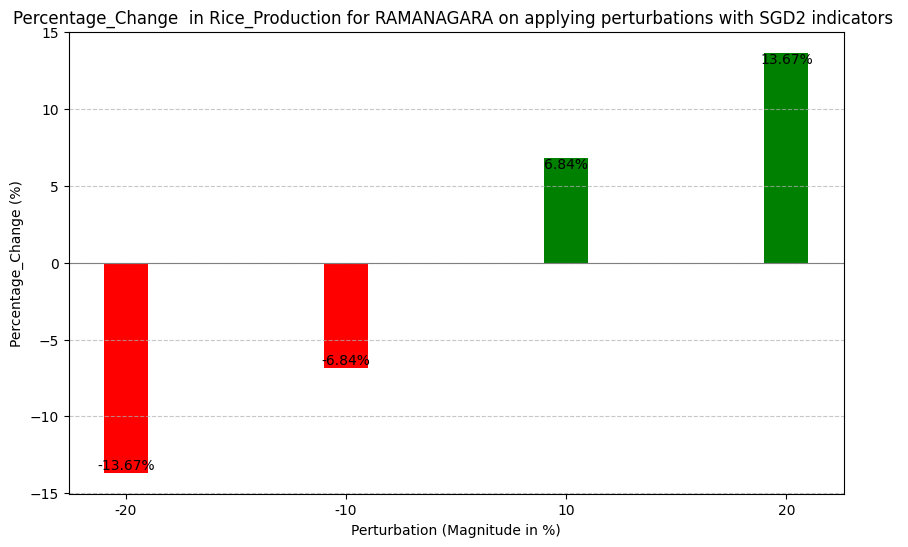

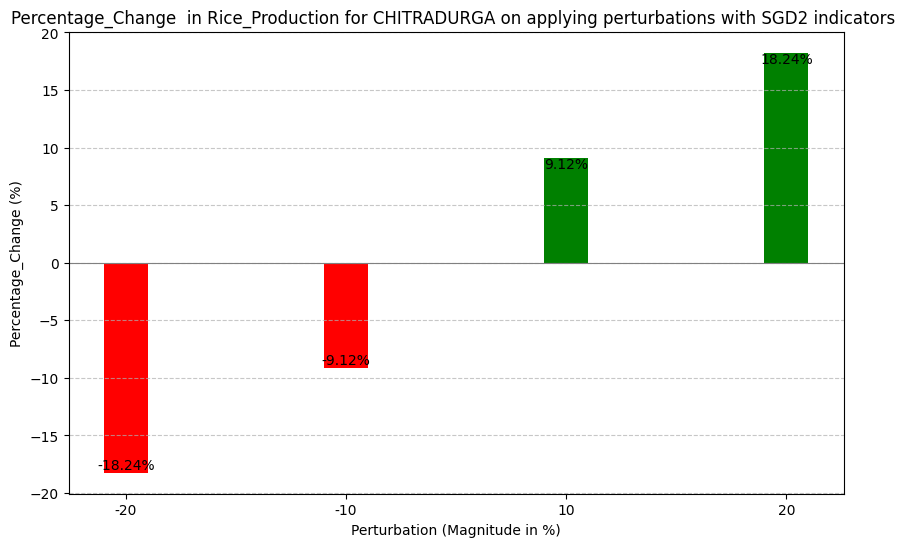

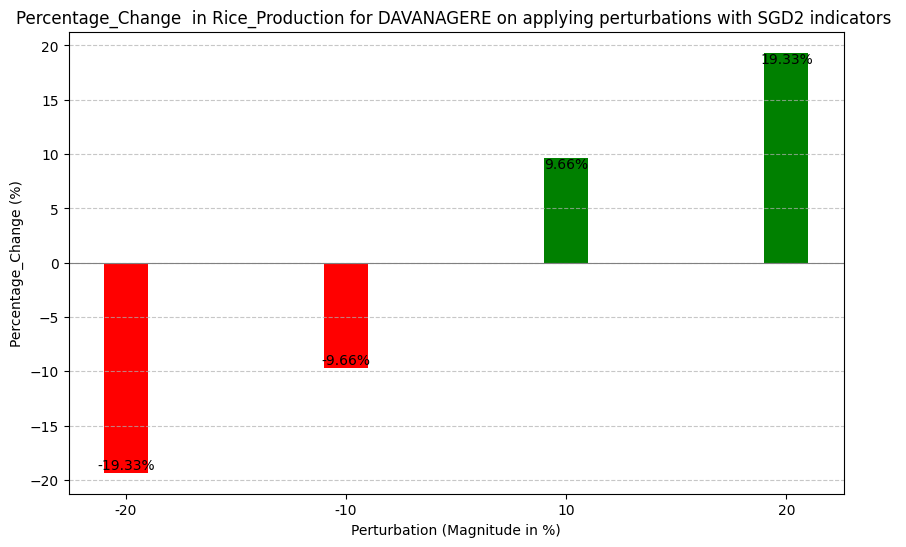

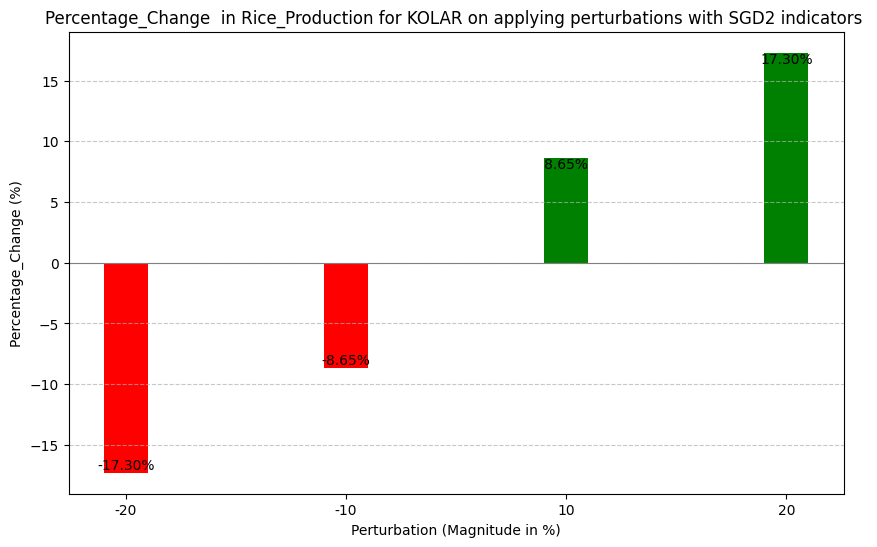

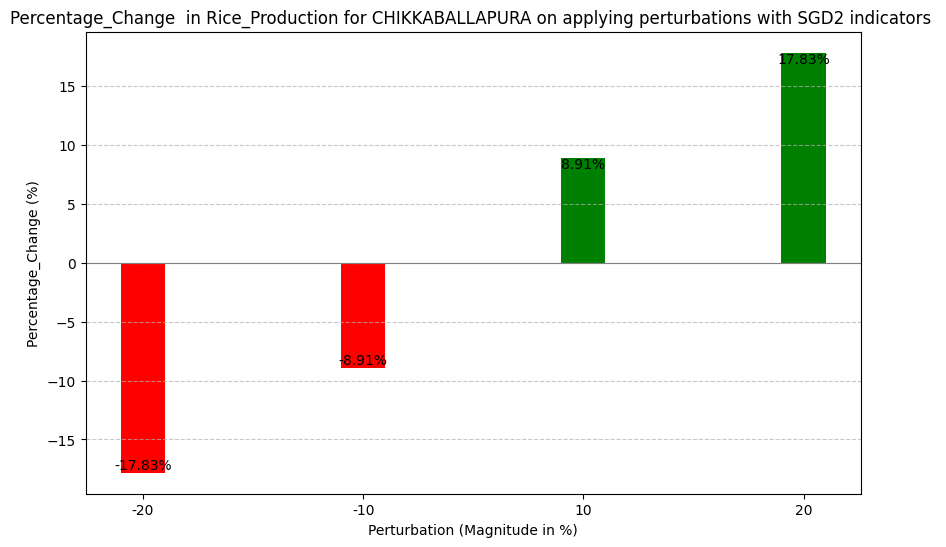

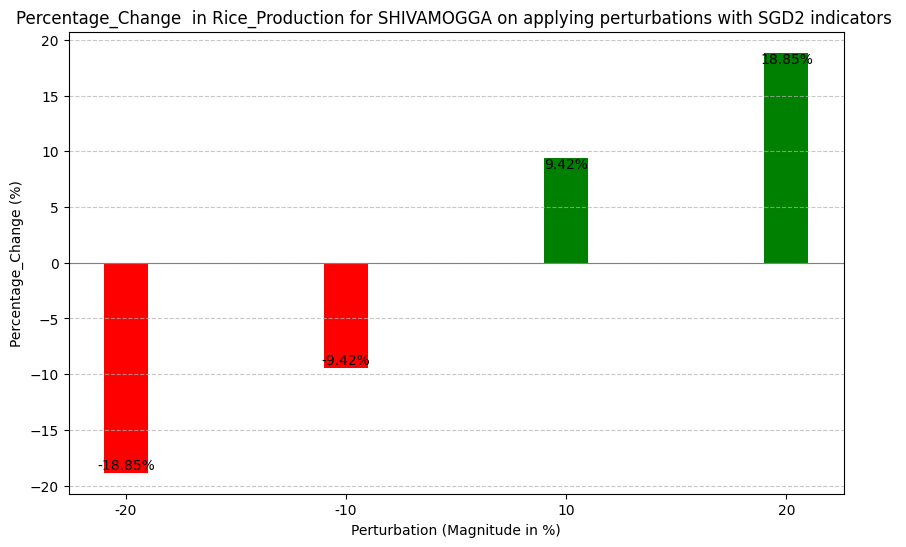

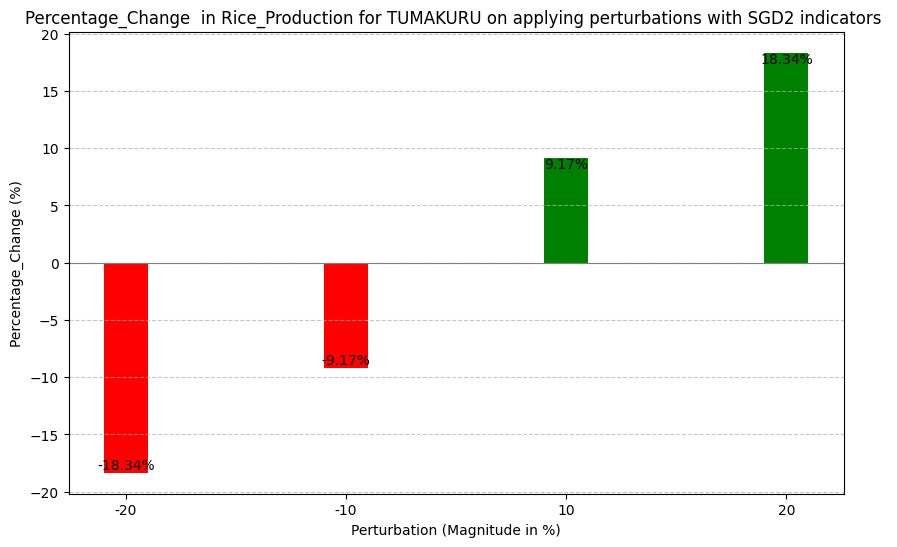

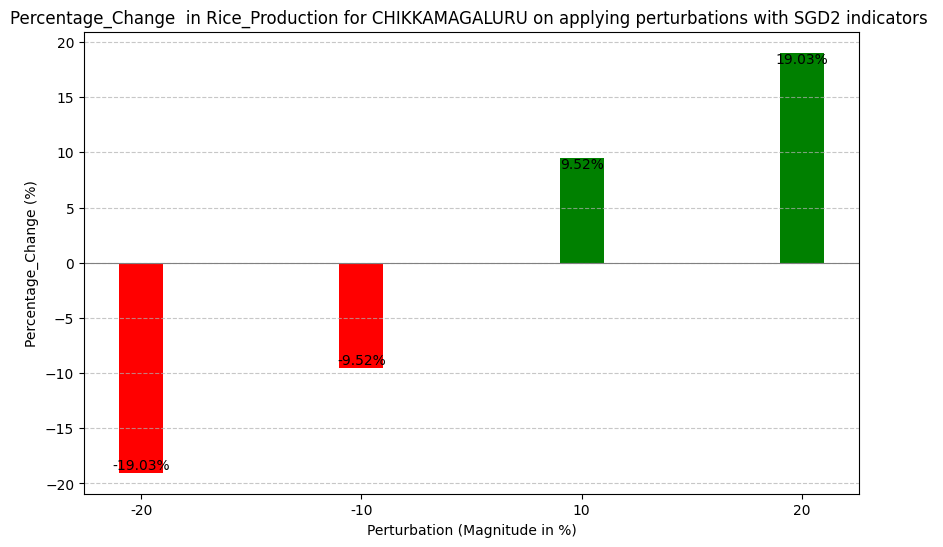

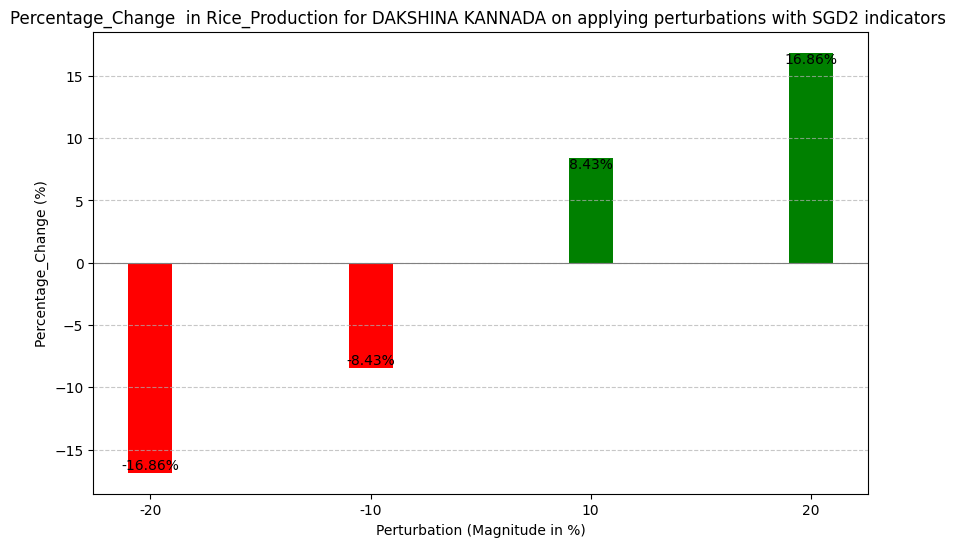

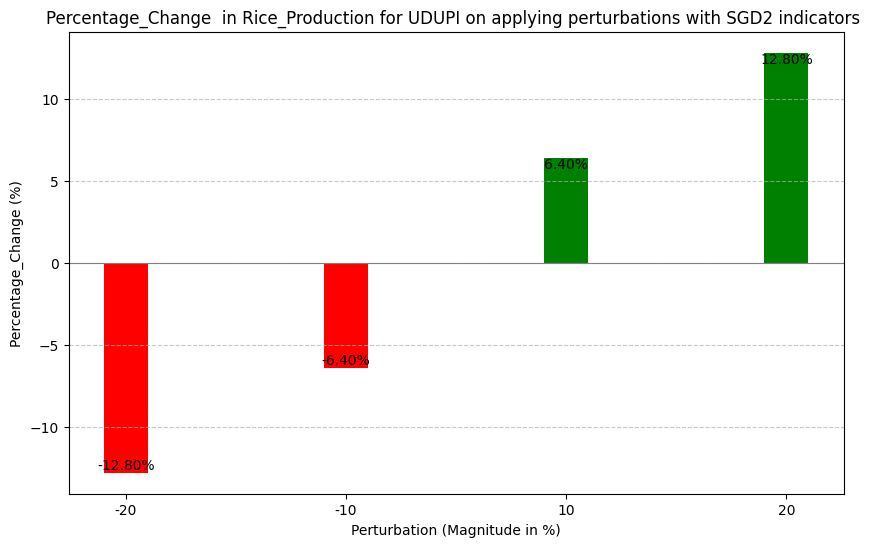

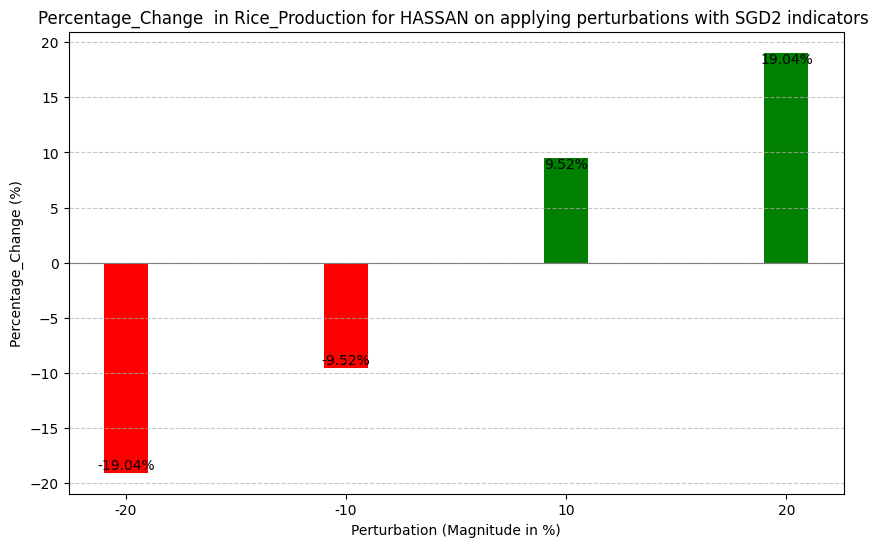

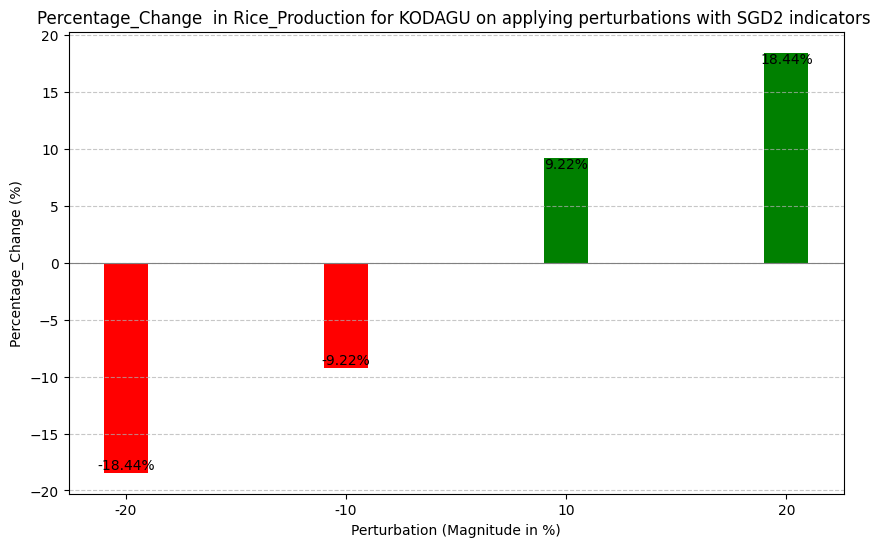

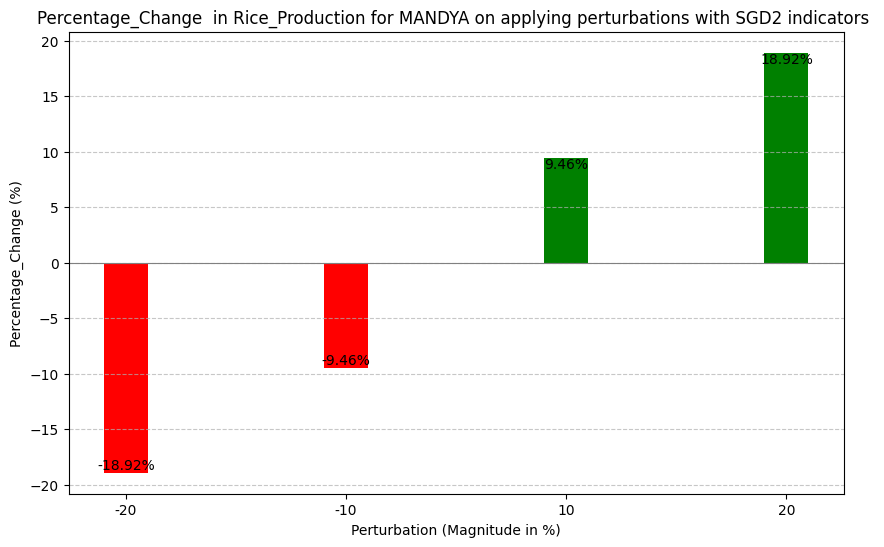

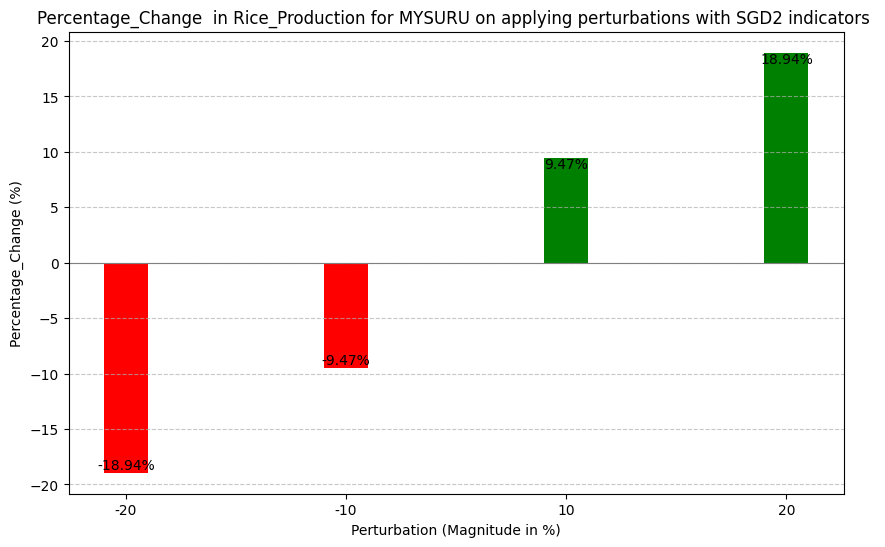

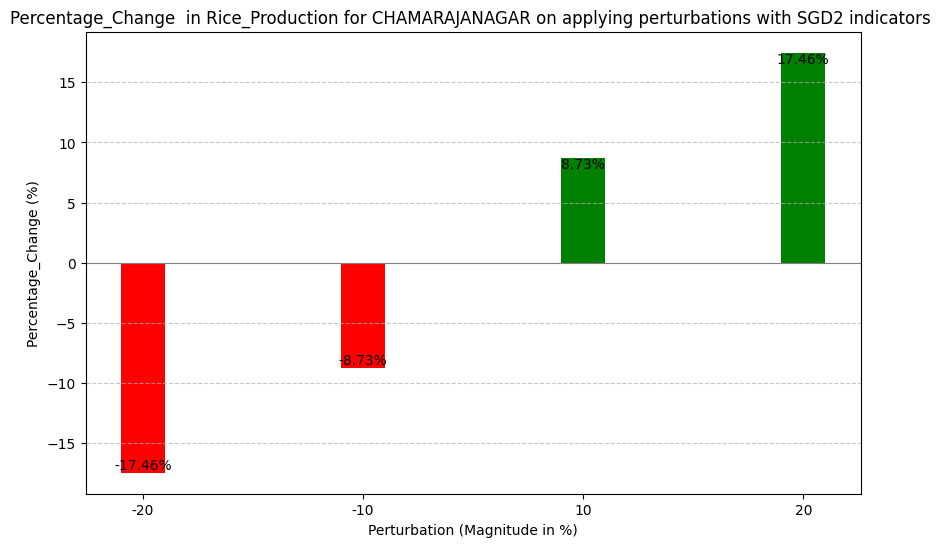

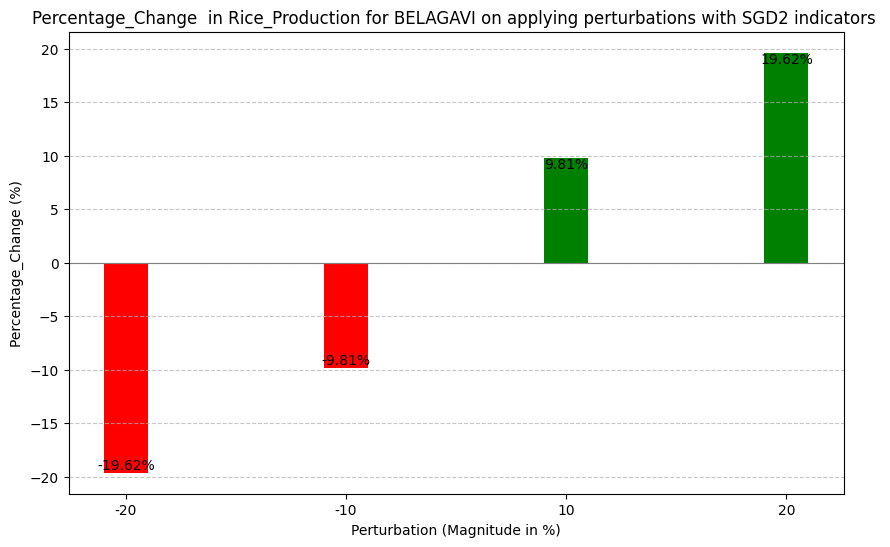

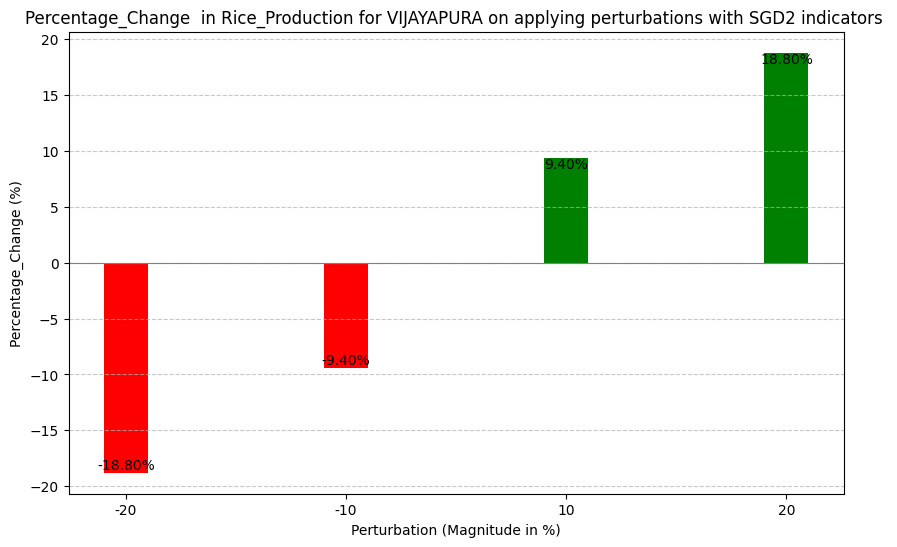

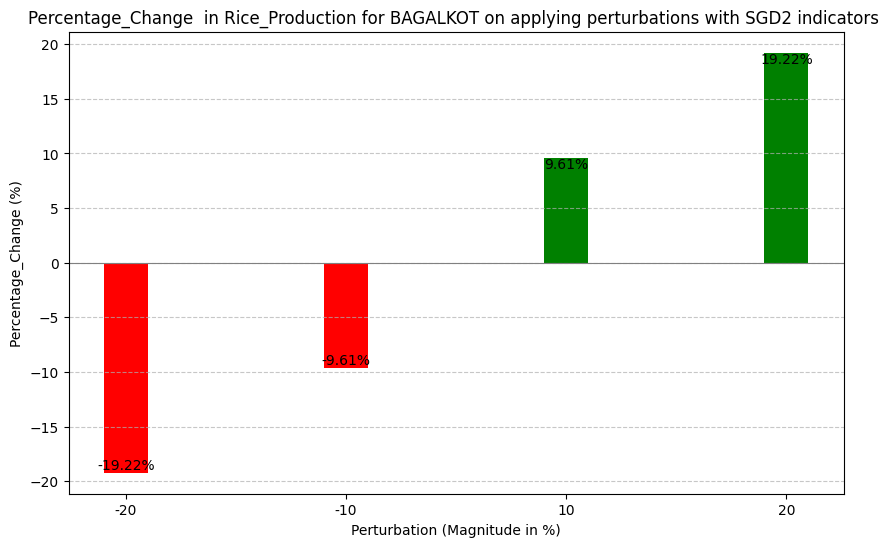

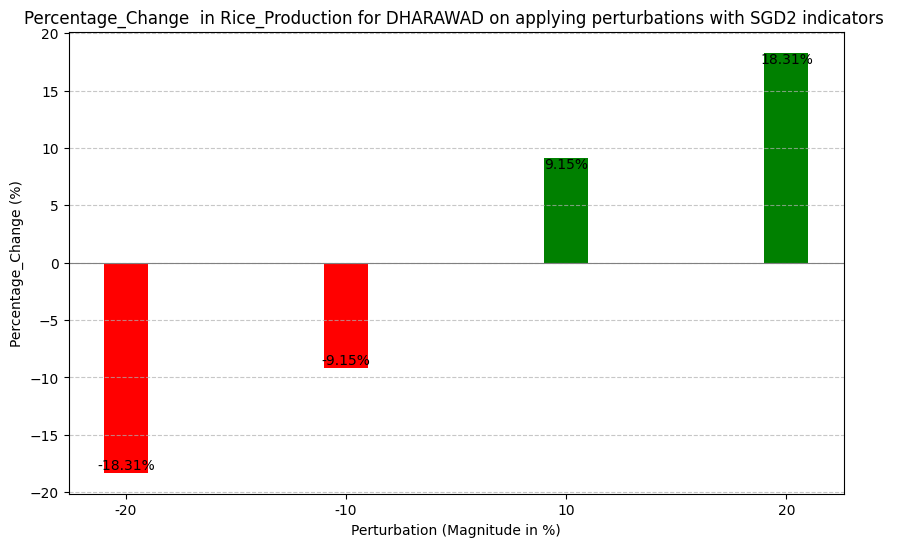

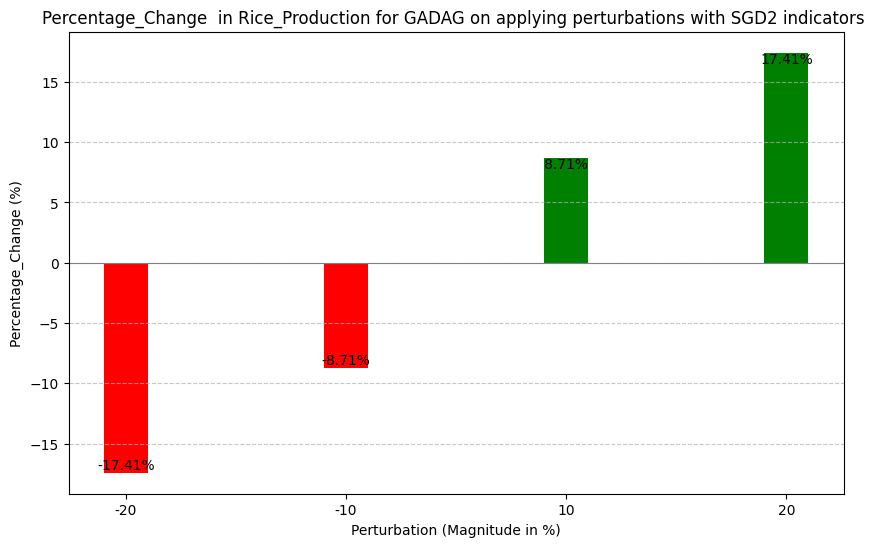

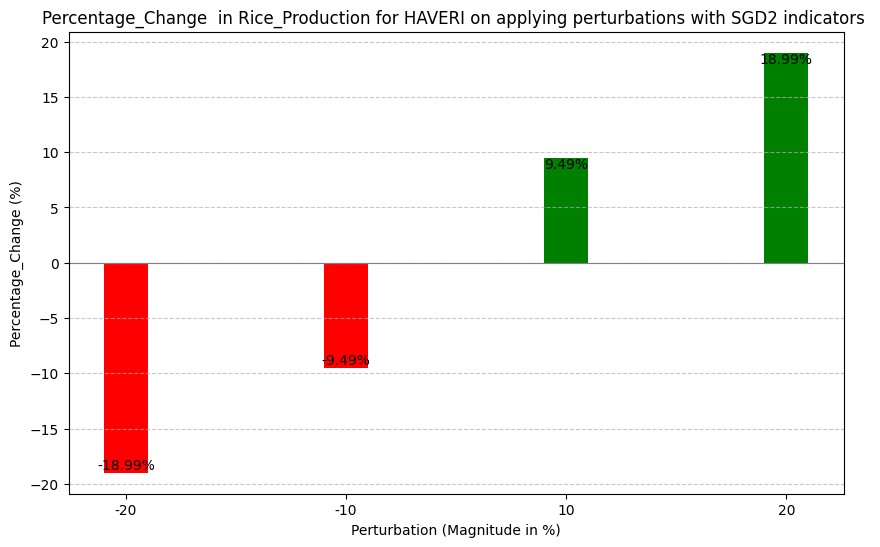

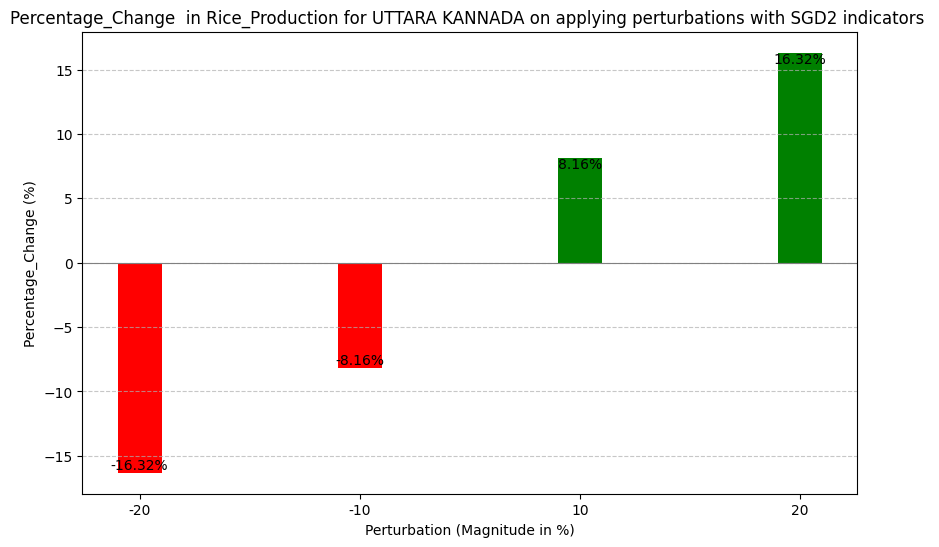

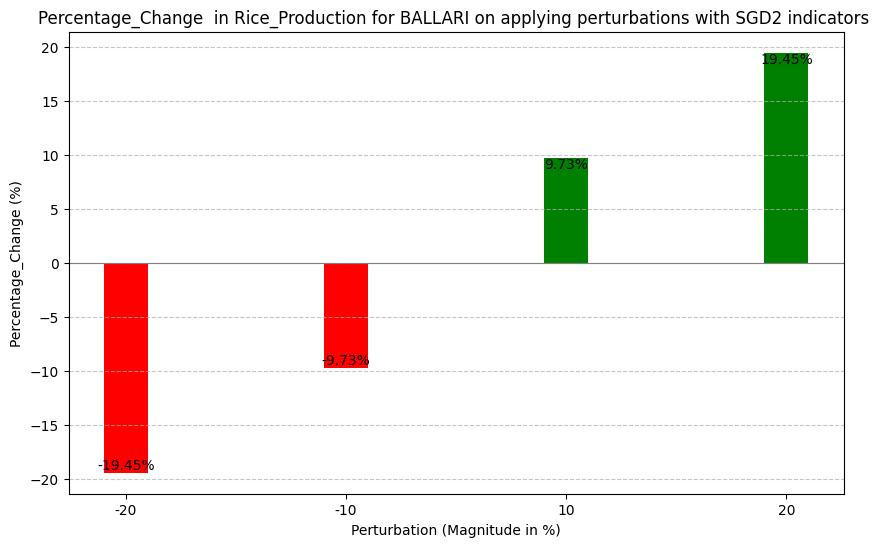

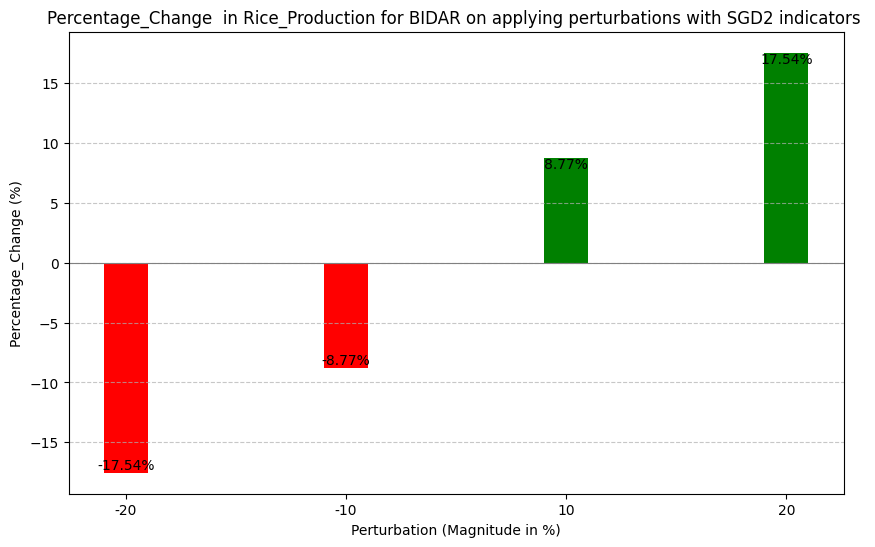

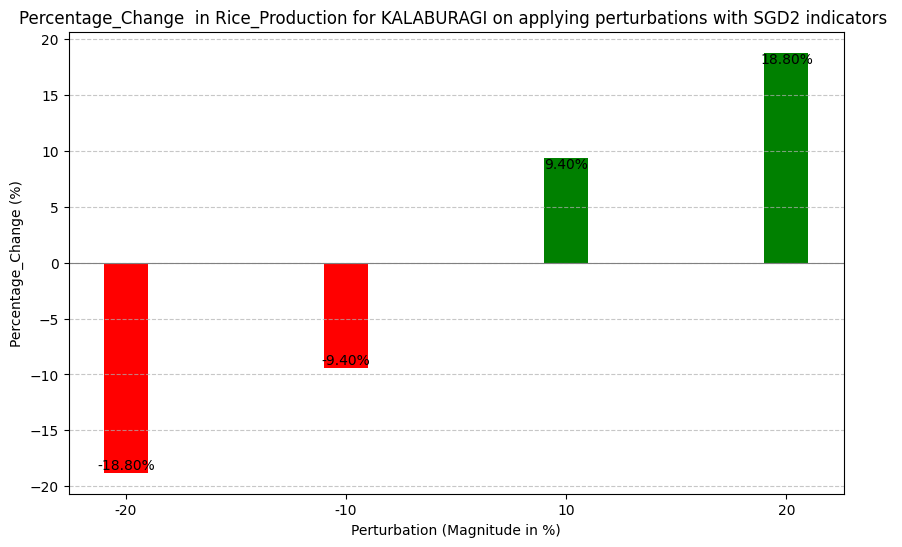

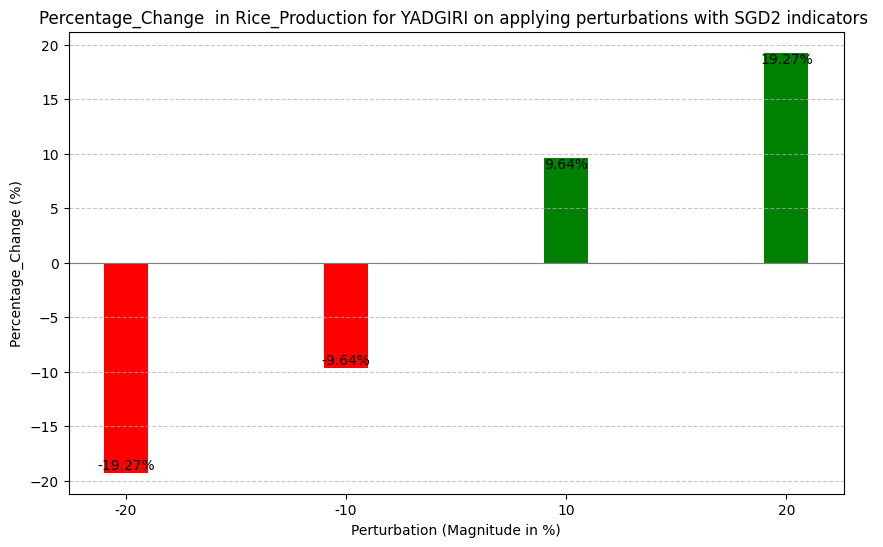

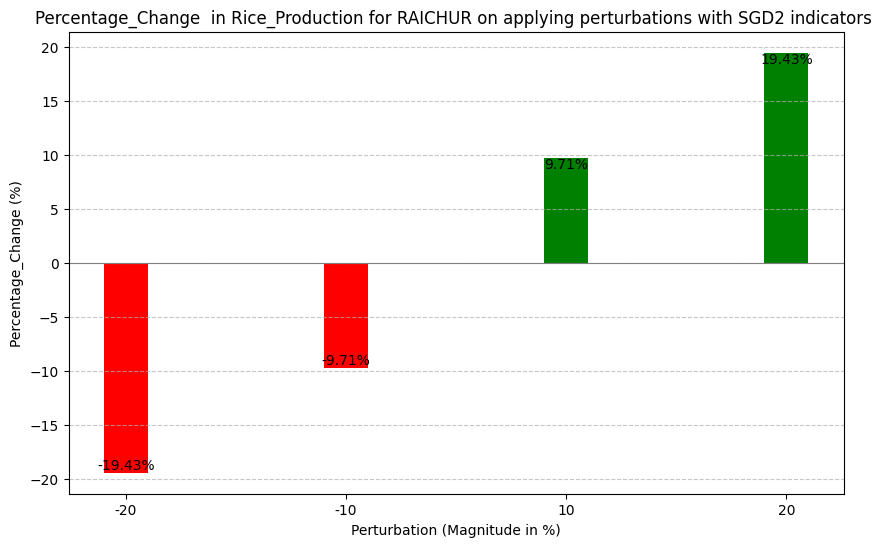

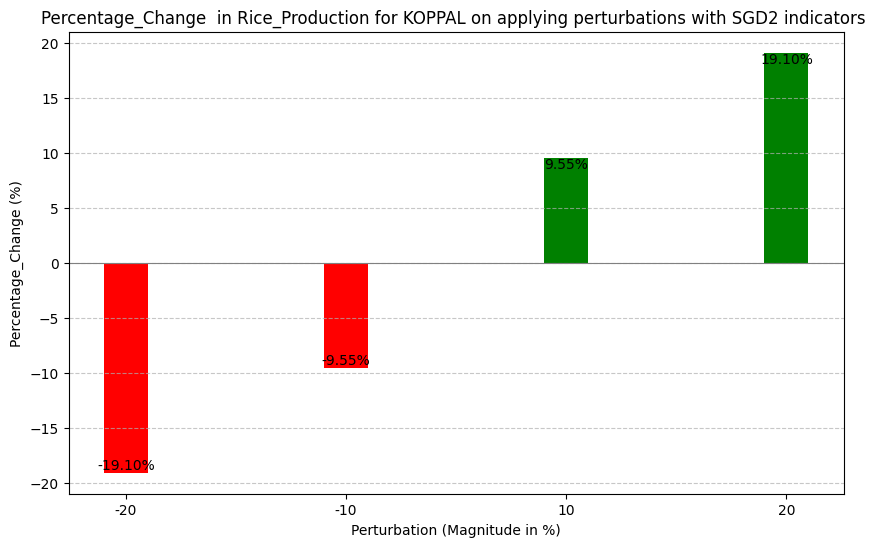

In [47]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Selecting the specified factor and capability vector
    X = data[[factor]]
    y = data[Capability_Vector]

    # Performing linear regression using statsmodels
    X_with_const = sm.add_constant(X)  # Adding a constant for intercept
    model = sm.OLS(y, X_with_const).fit()
    m = model.params[factor]  # Slope
    c = model.params['const']  # Intercept

    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]
        for p in perturbations:
            perturbation_ratio = p / 100.0
            perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

            cv_new = m * perturbed_factor_value + c
            cv_old = m * district_data[factor] + c

            # Calculating the percentage impact
            impact_percent = ((cv_new - cv_old) / cv_old) * 100

            results.append({
                'District': district_name,
                'Perturbation (%)': p,
                f'{Capability_Vector} (old)': cv_old.values[0],
                f'{Capability_Vector} (new)': cv_new.values[0],
                'Impact (%)': impact_percent.values[0],
            })

    results_df = pd.DataFrame(results)
    return results_df

def generate_colors(impacts):
    colors = []
    for impact in impacts:
        if impact > 0:
            color = 'green'
        elif impact < 0:
            color = 'red'
        else:
            color = 'gray'
        colors.append(color)
    return colors

def plot_impacts(results_df, Capability_Vector):
    for district_name in results_df['District'].unique():
        district_table = results_df[results_df['District'] == district_name].reset_index(drop=True)
        perturbations = district_table['Perturbation (%)']
        impacts = district_table['Impact (%)']
        colors = generate_colors(impacts)

        plt.figure(figsize=(10, 6))
        bars = plt.bar(perturbations.astype(str), impacts, color=colors, width=0.2)  # Adjusted width of bars

        plt.xlabel('Perturbation (Magnitude in %)')
        plt.ylabel('Percentage_Change (%)')
        plt.title(f'Percentage_Change  in {Capability_Vector} for {district_name} on applying perturbations with SGD2 indicators ')
        plt.axhline(0, color='gray', linewidth=0.8)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Annotating the bars with their respective impact values
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval,
                     f'{yval:.2f}%', ha='center', va='bottom' if yval < 0 else 'top', color='black')

        plt.show()



# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Update this path as needed
factor = 'TotalNPK'  # Factor to analyze
Capability_Vector = 'Rice_Production'  # Capability vector to predict
perturbations = [-20, -10, 10, 20]  # Perturbations in percentages

results_df = perform_analysis(file_path, factor, Capability_Vector, perturbations)
plot_impacts(results_df, Capability_Vector)


In [ ]:
#########HEATMAP ANALYSIS

In [ ]:
####RICE_PRODUCTION

<ipython-input-45-4d35d80165f5>:76: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = results_df.pivot("District", "Perturbation (%)", "Percentage Change (%)")


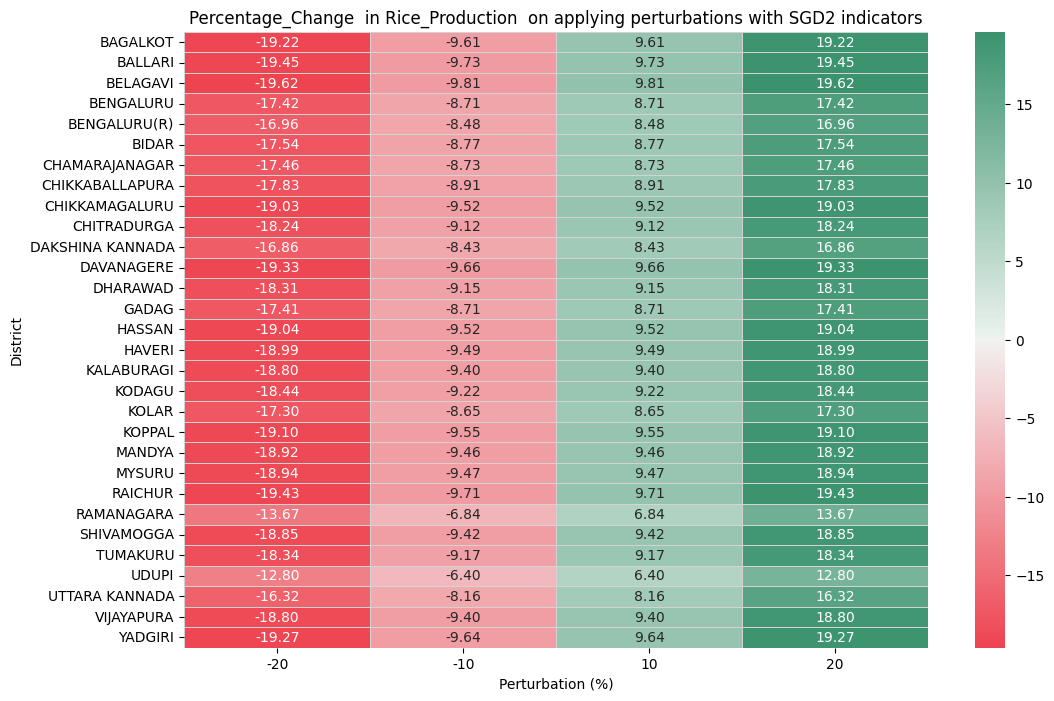

In [45]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    data = pd.read_csv(file_path)
    non_zero_data = data[data[Capability_Vector] != 0]

    x = non_zero_data[[factor]]
    y = non_zero_data[Capability_Vector]

    X_with_const = sm.add_constant(x)
    model = sm.OLS(y, X_with_const).fit()
    m = model.params[factor]
    c = model.params['const']

    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]

        if (district_data[Capability_Vector] == 0).all():
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability_Vector} (old)': 0,
                    f'{Capability_Vector} (new)': 0,
                    f'Change in {Capability_Vector}': 0,
                    'Percentage Change (%)': 0,
                })
        else:
            for p in perturbations:
                perturbation_ratio = p / 100.0
                perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

                cv_new = m * perturbed_factor_value + c
                cv_old = m * district_data[factor] + c

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old) * 100, 0)

                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability_Vector} (old)': cv_old.values[0],
                    f'{Capability_Vector} (new)': cv_new.values[0],
                    f'Change in {Capability_Vector}': cv_new.values[0] - cv_old.values[0],
                    'Percentage Change (%)': percent_change[0],
                })

    results_df = pd.DataFrame(results)
    return results_df

def plot_heatmap(impact_df):
    cmap = sns.diverging_palette(10, 150, s=80, l=55, as_cmap=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(impact_df, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='lightgrey')
    plt.title('Percentage_Change  in Rice_Production  on applying perturbations with SGD2 indicators')
    plt.xlabel('Perturbation (%)')
    plt.ylabel('District')

    plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'
factor = 'TotalNPK'
Capability_Vector = 'Rice_Production'
user_perturbations = [-20, -10, 10, 20]

# Perform analysis
results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

# Prepare data for heatmap
pivot_df = results_df.pivot("District", "Perturbation (%)", "Percentage Change (%)")

# Plot the heatmap
plot_heatmap(pivot_df)


In [ ]:
#####MAIZE PRODUCTION

<ipython-input-46-2d36549ee046>:76: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = results_df.pivot("District", "Perturbation (%)", "Percentage Change (%)")


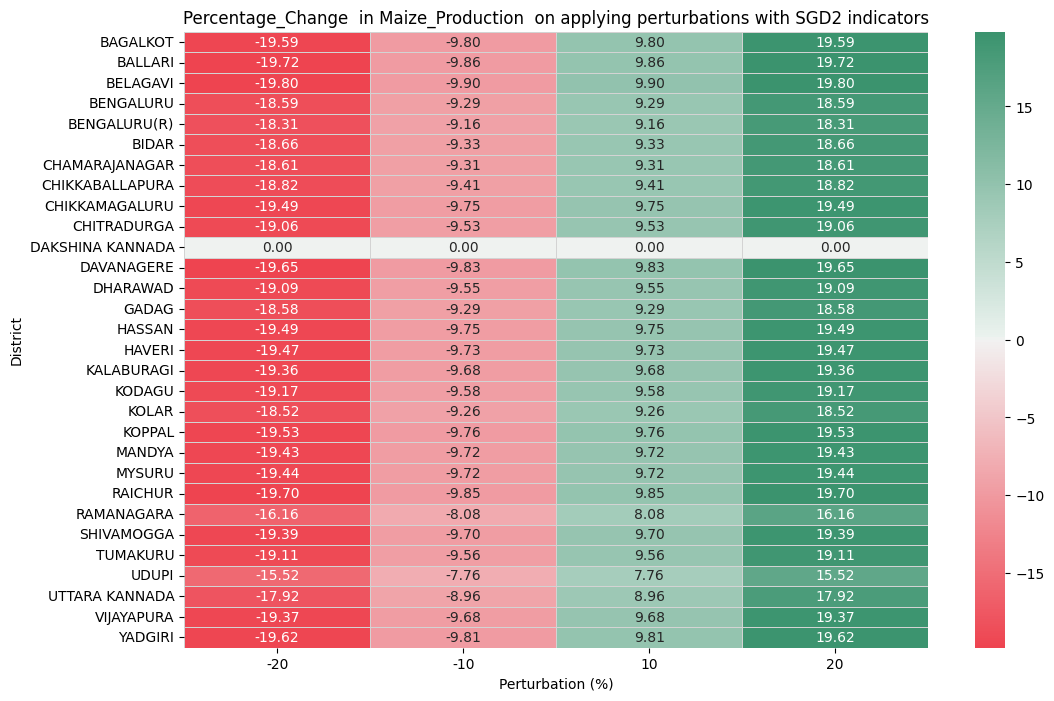

In [46]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    data = pd.read_csv(file_path)
    non_zero_data = data[data[Capability_Vector] != 0]

    x = non_zero_data[[factor]]
    y = non_zero_data[Capability_Vector]

    X_with_const = sm.add_constant(x)
    model = sm.OLS(y, X_with_const).fit()
    m = model.params[factor]
    c = model.params['const']

    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]

        if (district_data[Capability_Vector] == 0).all():
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability_Vector} (old)': 0,
                    f'{Capability_Vector} (new)': 0,
                    f'Change in {Capability_Vector}': 0,
                    'Percentage Change (%)': 0,
                })
        else:
            for p in perturbations:
                perturbation_ratio = p / 100.0
                perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

                cv_new = m * perturbed_factor_value + c
                cv_old = m * district_data[factor] + c

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old) * 100, 0)

                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability_Vector} (old)': cv_old.values[0],
                    f'{Capability_Vector} (new)': cv_new.values[0],
                    f'Change in {Capability_Vector}': cv_new.values[0] - cv_old.values[0],
                    'Percentage Change (%)': percent_change[0],
                })

    results_df = pd.DataFrame(results)
    return results_df

def plot_heatmap(impact_df):
    cmap = sns.diverging_palette(10, 150, s=80, l=55, as_cmap=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(impact_df, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='lightgrey')
    plt.title('Percentage_Change  in Maize_Production  on applying perturbations with SGD2 indicators')
    plt.xlabel('Perturbation (%)')
    plt.ylabel('District')

    plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'
factor = 'TotalNPK'
Capability_Vector = 'Maize_Production'
user_perturbations = [-20, -10, 10, 20]

# Perform analysis
results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

# Prepare data for heatmap
pivot_df = results_df.pivot("District", "Perturbation (%)", "Percentage Change (%)")

# Plot the heatmap
plot_heatmap(pivot_df)


In [ ]:
#########JOWAR YIELD

<ipython-input-43-e445d16eb08b>:76: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_df = results_df.pivot("District", "Perturbation (%)", "Percentage Change (%)")


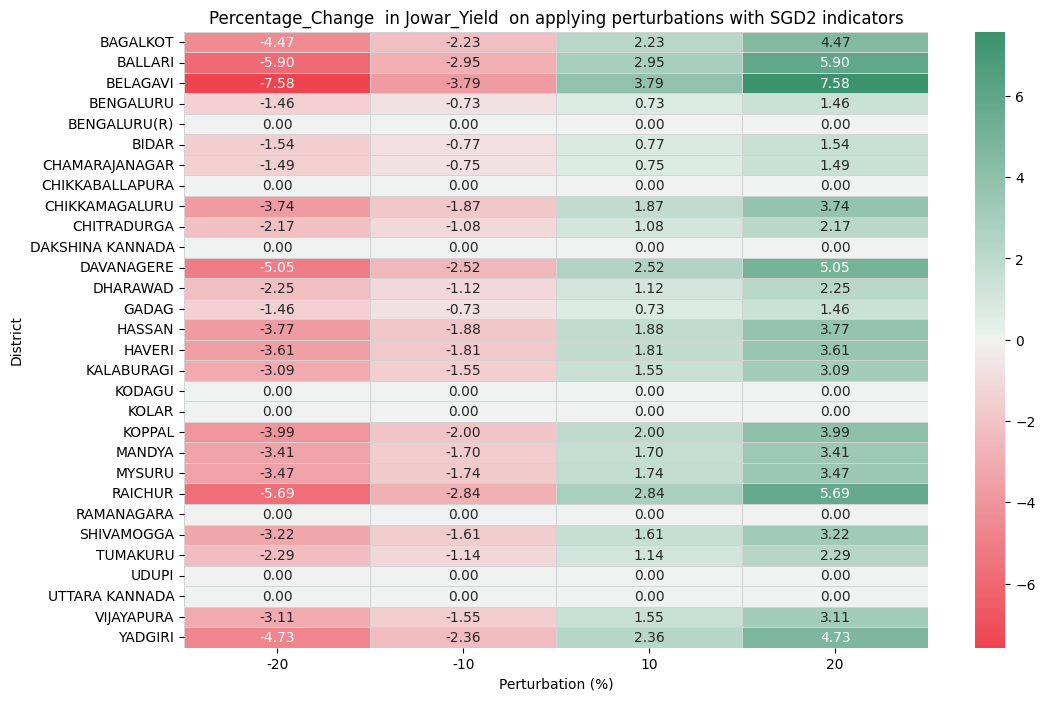

In [43]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    data = pd.read_csv(file_path)
    non_zero_data = data[data[Capability_Vector] != 0]

    x = non_zero_data[[factor]]
    y = non_zero_data[Capability_Vector]

    X_with_const = sm.add_constant(x)
    model = sm.OLS(y, X_with_const).fit()
    m = model.params[factor]
    c = model.params['const']

    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]

        if (district_data[Capability_Vector] == 0).all():
            for p in perturbations:
                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability_Vector} (old)': 0,
                    f'{Capability_Vector} (new)': 0,
                    f'Change in {Capability_Vector}': 0,
                    'Percentage Change (%)': 0,
                })
        else:
            for p in perturbations:
                perturbation_ratio = p / 100.0
                perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)

                cv_new = m * perturbed_factor_value + c
                cv_old = m * district_data[factor] + c

                percent_change = np.where(cv_old != 0, ((cv_new - cv_old) / cv_old) * 100, 0)

                results.append({
                    'District': district_name,
                    'Perturbation (%)': p,
                    f'{Capability_Vector} (old)': cv_old.values[0],
                    f'{Capability_Vector} (new)': cv_new.values[0],
                    f'Change in {Capability_Vector}': cv_new.values[0] - cv_old.values[0],
                    'Percentage Change (%)': percent_change[0],
                })

    results_df = pd.DataFrame(results)
    return results_df

def plot_heatmap(impact_df):
    cmap = sns.diverging_palette(10, 150, s=80, l=55, as_cmap=True)

    plt.figure(figsize=(12, 8))
    sns.heatmap(impact_df, annot=True, fmt=".2f", cmap=cmap, center=0, linewidths=0.5, linecolor='lightgrey')
    plt.title('Percentage_Change  in Jowar_Yield  on applying perturbations with SGD2 indicators')
    plt.xlabel('Perturbation (%)')
    plt.ylabel('District')

    plt.show()

# Example usage
file_path = '/content/Agriculture_KAG_2016_17.csv'
factor = 'TotalNPK'
Capability_Vector = 'Jowar_Yield'
user_perturbations = [-20, -10, 10, 20]

# Perform analysis
results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

# Prepare data for heatmap
pivot_df = results_df.pivot("District", "Perturbation (%)", "Percentage Change (%)")

# Plot the heatmap
plot_heatmap(pivot_df)


In [ ]:
################P1,P2,P3,P4 ANALYSIS FOR ALL 30 DISTRICTS

In [ ]:
#######P1 ANALYSIS

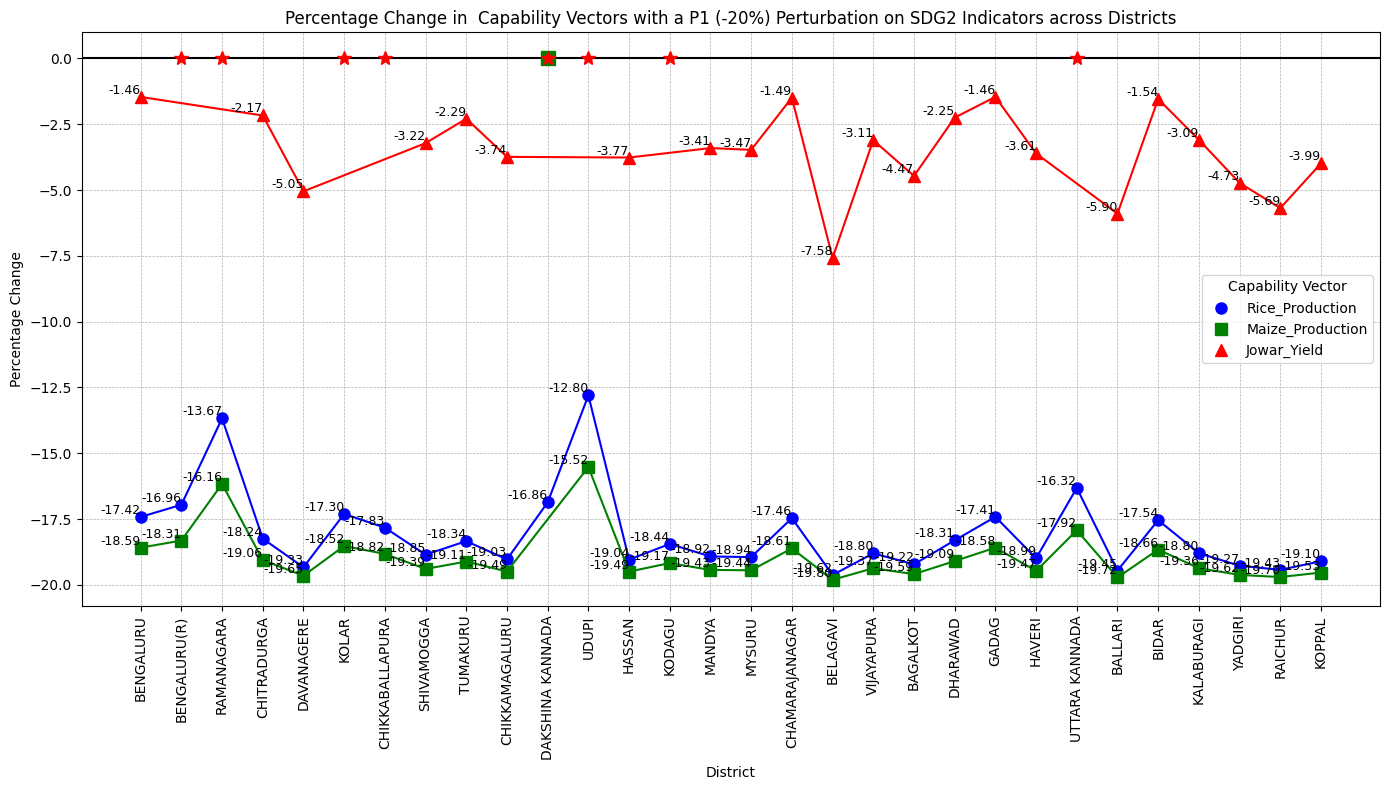

In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Calculate slopes and intercepts for each component of Capability_Vector
    slopes = {}
    intercepts = {}
    for col in Capability_Vector:
        # Filter out rows where the capability vector or the factor is zero or null
        filtered_data = data[(data[col] != 0) & (~data[col].isnull()) & (data[factor] != 0) & (~data[factor].isnull())]
        X = filtered_data[[factor]]
        y = filtered_data[col]

        if y.empty or X.empty:
            slopes[col] = np.nan
            intercepts[col] = np.nan
            continue

        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        slopes[col] = model.params[factor]
        intercepts[col] = model.params['const']
    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]

        for p in perturbations:
            perturbation_ratio = p / 100.0
            cv_old = []
            cv_new = []
            impact_percent = []

            for col in Capability_Vector:
                # Calculate old and new values considering the perturbation
                if district_data[col].eq(0).all():  # Check if all values are 0 for this capability
                    cv_old_val = 0
                    cv_new_val = 0
                    impact = 0
                else:
                    perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)
                    cv_old_val = slopes[col] * district_data[factor] + intercepts[col]
                    cv_new_val = slopes[col] * perturbed_factor_value + intercepts[col]
                    impact = ((cv_new_val - cv_old_val) / cv_old_val.replace(0, np.nan)) * 100

                cv_old.append(cv_old_val if isinstance(cv_old_val, (int, float)) else cv_old_val.values[0])
                cv_new.append(cv_new_val if isinstance(cv_new_val, (int, float)) else cv_new_val.values[0])
                impact_percent.append(impact if isinstance(impact, (int, float)) else impact.values[0])

            change = [new - old for new, old in zip(cv_new, cv_old)]

            results.append({
                'District': district_name,
                'Perturbation (%)': p,
                # 'cv_old': cv_old[:3],
                # 'cv_new': cv_new[:3],
                # 'Change': change,
                'Impact (%)': impact_percent,
            })

    results_df = pd.DataFrame(results)
    return results_df

# Adjust file_path, factor, Capability_Vector, and user_perturbations as needed
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Ensure this is correctly set
factor = 'TotalNPK'
Capability_Vector = ['Rice_Production', 'Maize_Production', 'Jowar_Yield']
user_perturbations = [-20]  # Example perturbations in percentages

results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

def plot_impact(results_df, Capability_Vector):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Get the current Axes instance

    # Darken the origin line
    ax.axhline(y=0, color='black', linewidth=1.5)

    colors = ['blue', 'green', 'red']
    markers = ['o', 's', '^']
    # zero_marker = '*'  # Marker for zero values
    # zero_marker1='s'

    for i, capability in enumerate(Capability_Vector):
        impact_percentages = results_df['Impact (%)'].apply(lambda x: x[i])

        # Iterate through each district to plot points
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact == 0:
                # Plot zero values with a star marker in specific color for each capability
                if capability == 'Rice_Production':
                    color = 'blue'
                    size = 10  # Increase size for rice production
                    zero_marker = '*'
                elif capability == 'Maize_Production':
                    color = 'green'
                    size = 10  # Keep size for maize production
                    zero_marker='s'
                elif capability == 'Jowar_Yield':
                    color = 'red'
                    size = 10  # Keep size for jowar yield
                    zero_marker = '*'
                else:
                    color = 'grey'
                    size = 10  # Default size for other capabilities
                    zero_marker = '*'
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=color, marker=zero_marker, linestyle='', markersize=size)
            else:
                # Plot non-zero values with corresponding markers
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=colors[i], marker=markers[i], linestyle='', markersize=8)

        # Connect non-zero points with lines
        non_zero_districts = results_df['District'][impact_percentages != 0]
        non_zero_impacts = impact_percentages[impact_percentages != 0]
        plt.plot(non_zero_districts, non_zero_impacts, color=colors[i], linestyle='-', linewidth=1.5)

        # Optionally, add data labels
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact != 0:  # Optionally skip zero values or adjust their position
                plt.text(district, impact, f"{impact:.2f}", fontsize=9, ha='right', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel('District')
    plt.ylabel('Percentage Change')
    plt.title('Percentage Change in  Capability Vectors with a P1 (-20%) Perturbation on SDG2 Indicators across Districts')
    plt.legend(title='Capability Vector')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.show()

plot_impact(results_df, Capability_Vector)


In [ ]:
########P2 ANALYIS

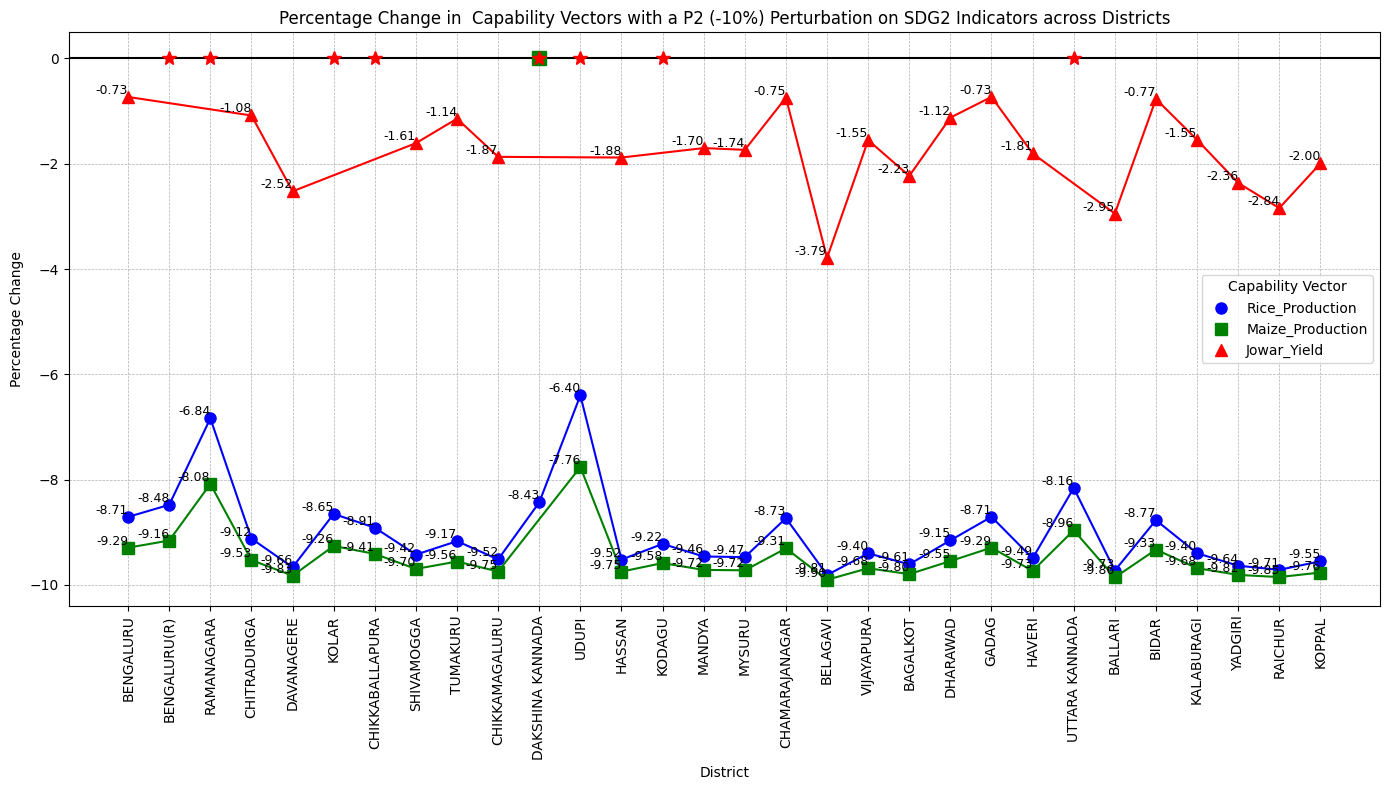

In [41]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Calculate slopes and intercepts for each component of Capability_Vector
    slopes = {}
    intercepts = {}
    for col in Capability_Vector:
        # Filter out rows where the capability vector or the factor is zero or null
        filtered_data = data[(data[col] != 0) & (~data[col].isnull()) & (data[factor] != 0) & (~data[factor].isnull())]
        X = filtered_data[[factor]]
        y = filtered_data[col]

        if y.empty or X.empty:
            slopes[col] = np.nan
            intercepts[col] = np.nan
            continue

        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        slopes[col] = model.params[factor]
        intercepts[col] = model.params['const']
    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]

        for p in perturbations:
            perturbation_ratio = p / 100.0
            cv_old = []
            cv_new = []
            impact_percent = []

            for col in Capability_Vector:
                # Calculate old and new values considering the perturbation
                if district_data[col].eq(0).all():  # Check if all values are 0 for this capability
                    cv_old_val = 0
                    cv_new_val = 0
                    impact = 0
                else:
                    perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)
                    cv_old_val = slopes[col] * district_data[factor] + intercepts[col]
                    cv_new_val = slopes[col] * perturbed_factor_value + intercepts[col]
                    impact = ((cv_new_val - cv_old_val) / cv_old_val.replace(0, np.nan)) * 100

                cv_old.append(cv_old_val if isinstance(cv_old_val, (int, float)) else cv_old_val.values[0])
                cv_new.append(cv_new_val if isinstance(cv_new_val, (int, float)) else cv_new_val.values[0])
                impact_percent.append(impact if isinstance(impact, (int, float)) else impact.values[0])

            change = [new - old for new, old in zip(cv_new, cv_old)]

            results.append({
                'District': district_name,
                'Perturbation (%)': p,
                # 'cv_old': cv_old[:3],
                # 'cv_new': cv_new[:3],
                # 'Change': change,
                'Impact (%)': impact_percent,
            })

    results_df = pd.DataFrame(results)
    return results_df

# Adjust file_path, factor, Capability_Vector, and user_perturbations as needed
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Ensure this is correctly set
factor = 'TotalNPK'
Capability_Vector = ['Rice_Production', 'Maize_Production', 'Jowar_Yield']
user_perturbations = [-10]  # Example perturbations in percentages

results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

def plot_impact(results_df, Capability_Vector):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Get the current Axes instance

    # Darken the origin line
    ax.axhline(y=0, color='black', linewidth=1.5)

    colors = ['blue', 'green', 'red']
    markers = ['o', 's', '^']
    # zero_marker = '*'  # Marker for zero values
    # zero_marker1='s'

    for i, capability in enumerate(Capability_Vector):
        impact_percentages = results_df['Impact (%)'].apply(lambda x: x[i])

        # Iterate through each district to plot points
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact == 0:
                # Plot zero values with a star marker in specific color for each capability
                if capability == 'Rice_Production':
                    color = 'blue'
                    size = 10  # Increase size for rice production
                    zero_marker = '*'
                elif capability == 'Maize_Production':
                    color = 'green'
                    size = 10  # Keep size for maize production
                    zero_marker='s'
                elif capability == 'Jowar_Yield':
                    color = 'red'
                    size = 10  # Keep size for jowar yield
                    zero_marker = '*'
                else:
                    color = 'grey'
                    size = 10  # Default size for other capabilities
                    zero_marker = '*'
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=color, marker=zero_marker, linestyle='', markersize=size)
            else:
                # Plot non-zero values with corresponding markers
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=colors[i], marker=markers[i], linestyle='', markersize=8)

        # Connect non-zero points with lines
        non_zero_districts = results_df['District'][impact_percentages != 0]
        non_zero_impacts = impact_percentages[impact_percentages != 0]
        plt.plot(non_zero_districts, non_zero_impacts, color=colors[i], linestyle='-', linewidth=1.5)

        # Optionally, add data labels
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact != 0:  # Optionally skip zero values or adjust their position
                plt.text(district, impact, f"{impact:.2f}", fontsize=9, ha='right', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel('District')
    plt.ylabel('Percentage Change')
    plt.title('Percentage Change in  Capability Vectors with a P2 (-10%) Perturbation on SDG2 Indicators across Districts')
    plt.legend(title='Capability Vector')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.show()

plot_impact(results_df, Capability_Vector)


In [ ]:
############P3 ANALYIS

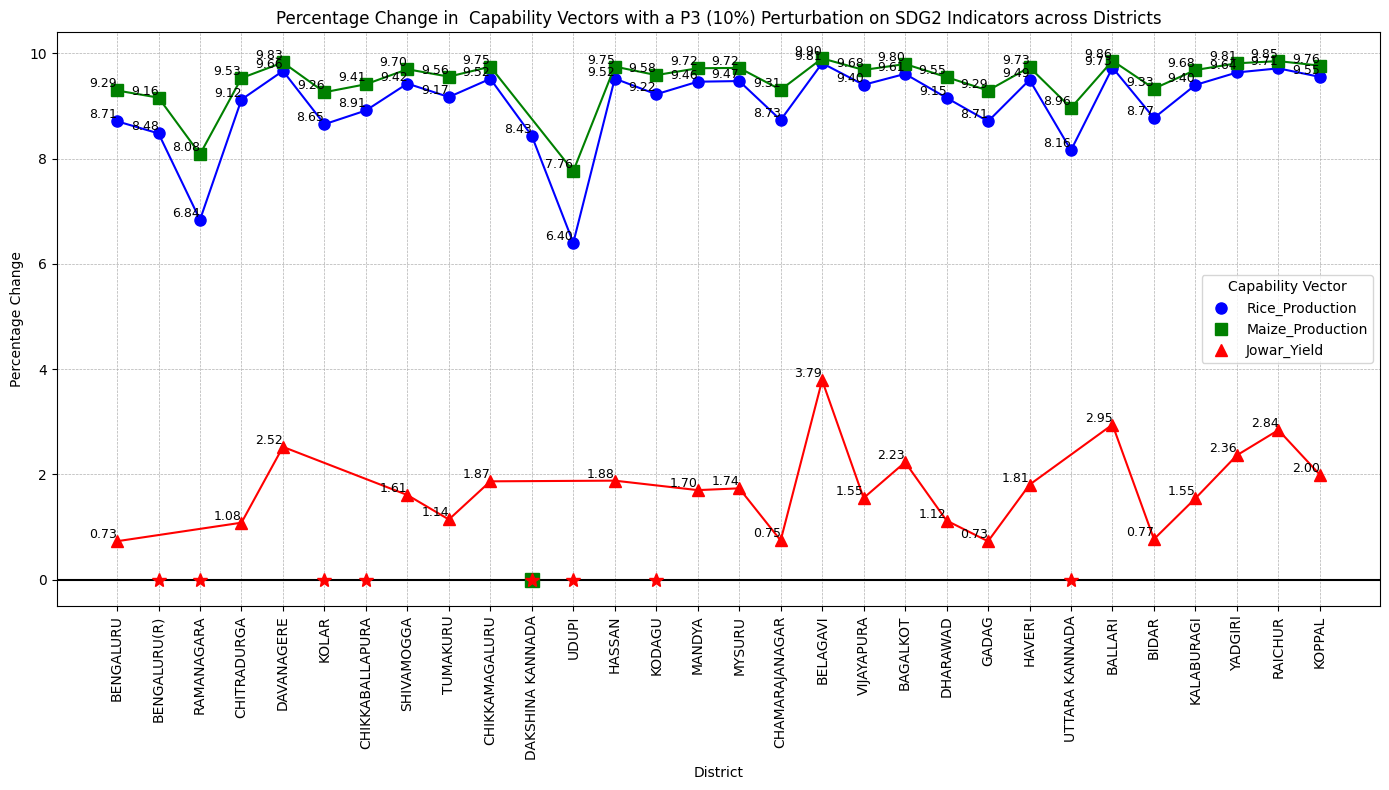

In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Calculate slopes and intercepts for each component of Capability_Vector
    slopes = {}
    intercepts = {}
    for col in Capability_Vector:
        # Filter out rows where the capability vector or the factor is zero or null
        filtered_data = data[(data[col] != 0) & (~data[col].isnull()) & (data[factor] != 0) & (~data[factor].isnull())]
        X = filtered_data[[factor]]
        y = filtered_data[col]

        if y.empty or X.empty:
            slopes[col] = np.nan
            intercepts[col] = np.nan
            continue

        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        slopes[col] = model.params[factor]
        intercepts[col] = model.params['const']
    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]

        for p in perturbations:
            perturbation_ratio = p / 100.0
            cv_old = []
            cv_new = []
            impact_percent = []

            for col in Capability_Vector:
                # Calculate old and new values considering the perturbation
                if district_data[col].eq(0).all():  # Check if all values are 0 for this capability
                    cv_old_val = 0
                    cv_new_val = 0
                    impact = 0
                else:
                    perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)
                    cv_old_val = slopes[col] * district_data[factor] + intercepts[col]
                    cv_new_val = slopes[col] * perturbed_factor_value + intercepts[col]
                    impact = ((cv_new_val - cv_old_val) / cv_old_val.replace(0, np.nan)) * 100

                cv_old.append(cv_old_val if isinstance(cv_old_val, (int, float)) else cv_old_val.values[0])
                cv_new.append(cv_new_val if isinstance(cv_new_val, (int, float)) else cv_new_val.values[0])
                impact_percent.append(impact if isinstance(impact, (int, float)) else impact.values[0])

            change = [new - old for new, old in zip(cv_new, cv_old)]

            results.append({
                'District': district_name,
                'Perturbation (%)': p,
                # 'cv_old': cv_old[:3],
                # 'cv_new': cv_new[:3],
                # 'Change': change,
                'Impact (%)': impact_percent,
            })

    results_df = pd.DataFrame(results)
    return results_df

# Adjust file_path, factor, Capability_Vector, and user_perturbations as needed
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Ensure this is correctly set
factor = 'TotalNPK'
Capability_Vector = ['Rice_Production', 'Maize_Production', 'Jowar_Yield']
user_perturbations = [10]  # Example perturbations in percentages

results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

def plot_impact(results_df, Capability_Vector):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Get the current Axes instance

    # Darken the origin line
    ax.axhline(y=0, color='black', linewidth=1.5)

    colors = ['blue', 'green', 'red']
    markers = ['o', 's', '^']
    # zero_marker = '*'  # Marker for zero values
    # zero_marker1='s'

    for i, capability in enumerate(Capability_Vector):
        impact_percentages = results_df['Impact (%)'].apply(lambda x: x[i])

        # Iterate through each district to plot points
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact == 0:
                # Plot zero values with a star marker in specific color for each capability
                if capability == 'Rice_Production':
                    color = 'blue'
                    size = 10  # Increase size for rice production
                    zero_marker = '*'
                elif capability == 'Maize_Production':
                    color = 'green'
                    size = 10  # Keep size for maize production
                    zero_marker='s'
                elif capability == 'Jowar_Yield':
                    color = 'red'
                    size = 10  # Keep size for jowar yield
                    zero_marker = '*'
                else:
                    color = 'grey'
                    size = 10  # Default size for other capabilities
                    zero_marker = '*'
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=color, marker=zero_marker, linestyle='', markersize=size)
            else:
                # Plot non-zero values with corresponding markers
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=colors[i], marker=markers[i], linestyle='', markersize=8)

        # Connect non-zero points with lines
        non_zero_districts = results_df['District'][impact_percentages != 0]
        non_zero_impacts = impact_percentages[impact_percentages != 0]
        plt.plot(non_zero_districts, non_zero_impacts, color=colors[i], linestyle='-', linewidth=1.5)

        # Optionally, add data labels
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact != 0:  # Optionally skip zero values or adjust their position
                plt.text(district, impact, f"{impact:.2f}", fontsize=9, ha='right', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel('District')
    plt.ylabel('Percentage Change')
    plt.title('Percentage Change in  Capability Vectors with a P3 (10%) Perturbation on SDG2 Indicators across Districts')
    plt.legend(title='Capability Vector')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.show()

plot_impact(results_df, Capability_Vector)


In [ ]:
#########P4 ANALYSIS

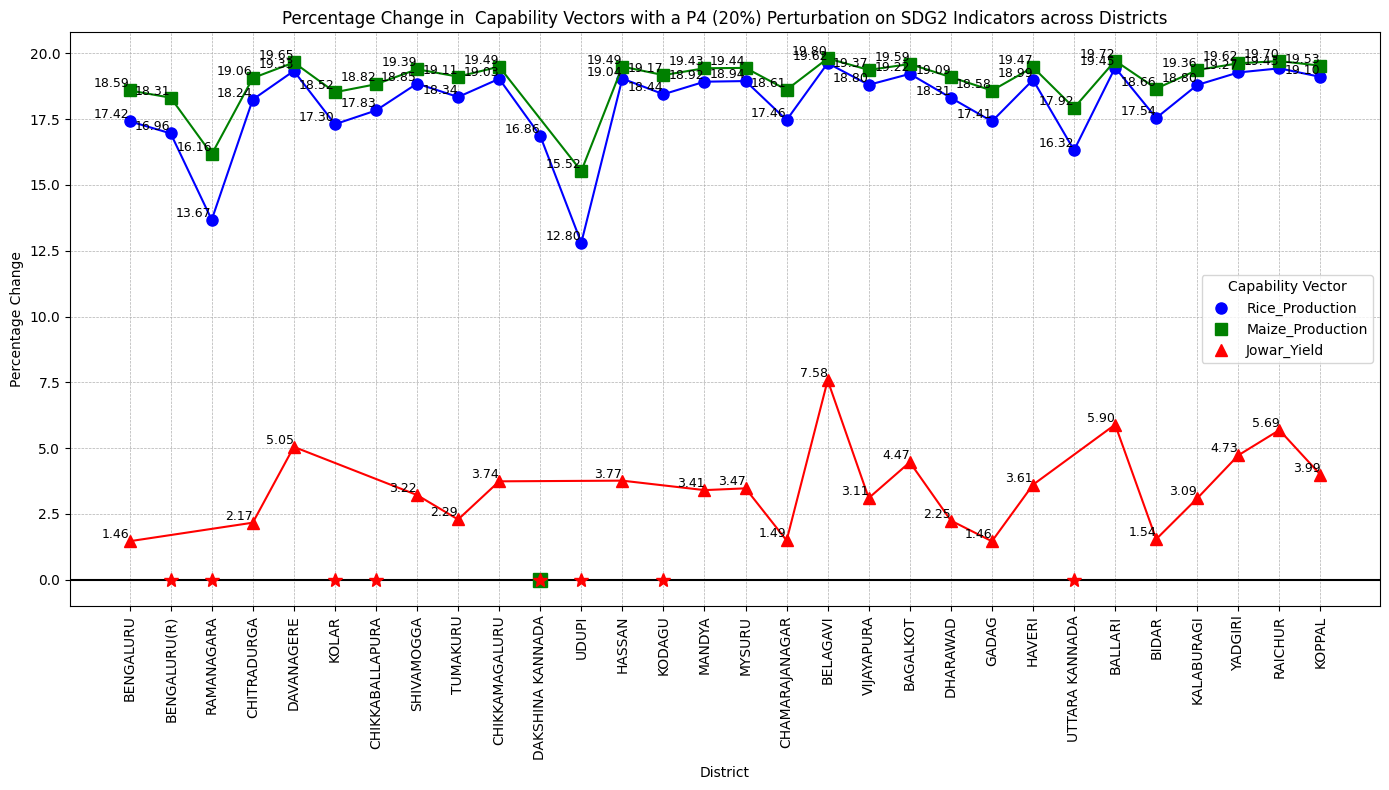

In [39]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

def perform_analysis(file_path, factor, Capability_Vector, perturbations):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Calculate slopes and intercepts for each component of Capability_Vector
    slopes = {}
    intercepts = {}
    for col in Capability_Vector:
        # Filter out rows where the capability vector or the factor is zero or null
        filtered_data = data[(data[col] != 0) & (~data[col].isnull()) & (data[factor] != 0) & (~data[factor].isnull())]
        X = filtered_data[[factor]]
        y = filtered_data[col]

        if y.empty or X.empty:
            slopes[col] = np.nan
            intercepts[col] = np.nan
            continue

        X_with_const = sm.add_constant(X)
        model = sm.OLS(y, X_with_const).fit()
        slopes[col] = model.params[factor]
        intercepts[col] = model.params['const']
    results = []
    for district_name in data['District'].unique():
        district_data = data[data['District'] == district_name]

        for p in perturbations:
            perturbation_ratio = p / 100.0
            cv_old = []
            cv_new = []
            impact_percent = []

            for col in Capability_Vector:
                # Calculate old and new values considering the perturbation
                if district_data[col].eq(0).all():  # Check if all values are 0 for this capability
                    cv_old_val = 0
                    cv_new_val = 0
                    impact = 0
                else:
                    perturbed_factor_value = district_data[factor] * (1 + perturbation_ratio)
                    cv_old_val = slopes[col] * district_data[factor] + intercepts[col]
                    cv_new_val = slopes[col] * perturbed_factor_value + intercepts[col]
                    impact = ((cv_new_val - cv_old_val) / cv_old_val.replace(0, np.nan)) * 100

                cv_old.append(cv_old_val if isinstance(cv_old_val, (int, float)) else cv_old_val.values[0])
                cv_new.append(cv_new_val if isinstance(cv_new_val, (int, float)) else cv_new_val.values[0])
                impact_percent.append(impact if isinstance(impact, (int, float)) else impact.values[0])

            change = [new - old for new, old in zip(cv_new, cv_old)]

            results.append({
                'District': district_name,
                'Perturbation (%)': p,
                # 'cv_old': cv_old[:3],
                # 'cv_new': cv_new[:3],
                # 'Change': change,
                'Impact (%)': impact_percent,
            })

    results_df = pd.DataFrame(results)
    return results_df

# Adjust file_path, factor, Capability_Vector, and user_perturbations as needed
file_path = '/content/Agriculture_KAG_2016_17.csv'  # Ensure this is correctly set
factor = 'TotalNPK'
Capability_Vector = ['Rice_Production', 'Maize_Production', 'Jowar_Yield']
user_perturbations = [20]  # Example perturbations in percentages

results_df = perform_analysis(file_path, factor, Capability_Vector, user_perturbations)

def plot_impact(results_df, Capability_Vector):
    plt.figure(figsize=(14, 8))
    ax = plt.gca()  # Get the current Axes instance

    # Darken the origin line
    ax.axhline(y=0, color='black', linewidth=1.5)

    colors = ['blue', 'green', 'red']
    markers = ['o', 's', '^']
    # zero_marker = '*'  # Marker for zero values
    # zero_marker1='s'

    for i, capability in enumerate(Capability_Vector):
        impact_percentages = results_df['Impact (%)'].apply(lambda x: x[i])

        # Iterate through each district to plot points
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact == 0:
                # Plot zero values with a star marker in specific color for each capability
                if capability == 'Rice_Production':
                    color = 'blue'
                    size = 10  # Increase size for rice production
                    zero_marker = '*'
                elif capability == 'Maize_Production':
                    color = 'green'
                    size = 10  # Keep size for maize production
                    zero_marker='s'
                elif capability == 'Jowar_Yield':
                    color = 'red'
                    size = 10  # Keep size for jowar yield
                    zero_marker = '*'
                else:
                    color = 'grey'
                    size = 10  # Default size for other capabilities
                    zero_marker = '*'
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=color, marker=zero_marker, linestyle='', markersize=size)
            else:
                # Plot non-zero values with corresponding markers
                plt.plot(district, impact, label=capability if district == results_df['District'][0] else "", color=colors[i], marker=markers[i], linestyle='', markersize=8)

        # Connect non-zero points with lines
        non_zero_districts = results_df['District'][impact_percentages != 0]
        non_zero_impacts = impact_percentages[impact_percentages != 0]
        plt.plot(non_zero_districts, non_zero_impacts, color=colors[i], linestyle='-', linewidth=1.5)

        # Optionally, add data labels
        for district, impact in zip(results_df['District'], impact_percentages):
            if impact != 0:  # Optionally skip zero values or adjust their position
                plt.text(district, impact, f"{impact:.2f}", fontsize=9, ha='right', va='bottom')

    plt.xticks(rotation=90)
    plt.xlabel('District')
    plt.ylabel('Percentage Change')
    plt.title('Percentage Change in  Capability Vectors with a P4 (20%) Perturbation on SDG2 Indicators across Districts')
    plt.legend(title='Capability Vector')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()

    plt.show()

plot_impact(results_df, Capability_Vector)
